# Study 3: Survey Data Preprocessing

In [239]:
#Loading necessary packages

import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 100, 'display.max_columns', 100)

### Steps

1. Load the Parents Surveys from the different schools and merge them [Jump to Parent Survey Section](#1-loading-parents-survey-data)
2. Load the childrens' surveys from the different schools and merge them [Jump to Children Survey Section](#loading-children-survey-data)
3. Preprocessing survey data
4. Transforming Merge Datagrame from Wide Format to Long Format for Analysis

## 1. Loading Parents Survey Data

### 1.1 GSR School Haarlem

In [110]:
#Loading the File
gsr_parents = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/GSR_parents.csv')

In [111]:
#Creating a column with full name
gsr_parents["Name"] = gsr_parents["Name_child"] + " " + gsr_parents["Lastname_child"]

In [112]:
#Dropping parents that filled in the form multiple times
gsr_parents.dropna(subset=['Name'], inplace=True)
gsr_parents.drop_duplicates(subset=['Name'], inplace=True)
len(gsr_parents)

112

In [114]:
#Check if these are all unique items
len(gsr_parents["Name"].unique())

112

In [115]:
#Consent overview for the GSR
gsr_parents["Consent"].value_counts()

Consent
Ik stem WEL in met deelname van mijn kind aan het onderzoek.                                             98
Ik stem NIET in met deelname van mijn kind aan het onderzoek.                                            12
Mij is gevraagd om toestemming te verlenen voor deelname aan bovenvermeld wetenschappelijk onderzoek:     1
{"ImportId":"QID3"}                                                                                       1
Name: count, dtype: int64

### 1.2. Wolfert Rotterdam

In [116]:
#Loading the file
wolfert_parents = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/wolfert_parents.csv')

In [117]:
#Creating a column with full name
wolfert_parents["Name"] = wolfert_parents["Name_child"] + " " + wolfert_parents["Lastname_child"]

In [120]:
#Dropping parents that filled in the form multiple times
wolfert_parents.dropna(subset=['Name'], inplace=True)
print(len(wolfert_parents))
wolfert_parents.drop_duplicates(subset=['Name'], inplace=True)
len(wolfert_parents)

#Check
print(len(wolfert_parents["Name"].unique()))

56
56


In [121]:
#Consent overview for the Wolfert
wolfert_parents["Consent"].value_counts()

Consent
Ik stem WEL in met deelname van mijn kind aan het onderzoek.                                             47
Ik stem NIET in met deelname van mijn kind aan het onderzoek.                                             7
Mij is gevraagd om toestemming te verlenen voor deelname aan bovenvermeld wetenschappelijk onderzoek:     1
{"ImportId":"QID3"}                                                                                       1
Name: count, dtype: int64

### 1.3. Almere

In [125]:
#Loading the File
almere_parents = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/Parential Consent Social Movez Almere_October 23, 2024_06.37.csv')

In [126]:
# #Creating a column with full name
almere_parents["Name"] = almere_parents["Name_child"] + " " + almere_parents["Lastname_child"]

In [127]:
almere_parents.dropna(subset=['Name'], inplace=True)
print(len(almere_parents))
almere_parents.drop_duplicates(subset=['Name'], inplace=True)
len(almere_parents)

158


149

In [128]:
#Consent overview for Utrecht
almere_parents["Consent"].value_counts()

Consent
Ik stem WEL in met deelname van mijn kind aan het onderzoek.                                             133
Ik stem NIET in met deelname van mijn kind aan het onderzoek.                                             14
Mij is gevraagd om toestemming te verlenen voor deelname aan bovenvermeld wetenschappelijk onderzoek:      1
{"ImportId":"QID3"}                                                                                        1
Name: count, dtype: int64

### 1.4. Utrecht Bilthoven

In [129]:
#Loading the File
utrecht_parents = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/utrecht_parents.csv')

In [130]:
# #Creating a column with full name
utrecht_parents["Name"] = utrecht_parents["Name_child"] + " " + utrecht_parents["Lastname_child"]

In [131]:
utrecht_parents.dropna(subset=['Name'], inplace=True)
print(len(utrecht_parents))
utrecht_parents.drop_duplicates(subset=['Name'], inplace=True)
len(utrecht_parents)

149


136

In [132]:
#Consent overview for Utrecht
utrecht_parents["Consent"].value_counts()

Consent
Ik stem WEL in met deelname van mijn kind aan het onderzoek.                                             126
Ik stem NIET in met deelname van mijn kind aan het onderzoek.                                              8
Mij is gevraagd om toestemming te verlenen voor deelname aan bovenvermeld wetenschappelijk onderzoek:      1
{"ImportId":"QID3"}                                                                                        1
Name: count, dtype: int64

In [21]:
#message_jonas.to_csv('jonas_messages.csv', encoding='utf-8', index=False)

## 2. Loading Children Survey Data

### 2.1. GSR Surveys

In [135]:
#Loading all data from the GSR for the different waves

gsr_t1 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/GSR T1.csv')
gsr_t15 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/GSR T1.5n.csv')
gsr_t2 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/GSR T2.csv')
gsr_t2_post = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/GSR post T2.csv')

gsr_t15 = gsr_t15.tail(-2)
gsr_t1 = gsr_t1.tail(-2)
gsr_t2 = gsr_t2.tail(-2)
gsr_t2_post = gsr_t2_post.tail(-2)

print(len(gsr_t1), len(gsr_t15), len(gsr_t2), len(gsr_t2_post))

101 26 51 4


In [136]:
#Dropping empty entries, where School_mail has not been filled out (non-identifiable)

gsr_t1.dropna(subset=['School_mail'], inplace=True)
gsr_t15.dropna(subset=['School_mail'], inplace=True)
gsr_t2.dropna(subset=['School_mail'], inplace=True)
gsr_t2_post.dropna(subset=['School_mail'], inplace=True)

gsr_t1 = gsr_t1.drop(gsr_t1[gsr_t1['School_mail'] == 'j.schlicht@t-online.de'].index)
gsr_t15 = gsr_t15.drop(gsr_t15[gsr_t15['School_mail'] == 'j.schlicht@t-online.de'].index)
gsr_t2 = gsr_t2.drop(gsr_t2[gsr_t2['School_mail'] == 'j.schlicht@t-online.de'].index)

gsr_t1 = gsr_t1.rename(columns={"Random ID": "Movez_code"})

print(len(gsr_t1), len(gsr_t15), len(gsr_t2), len(gsr_t2_post))

87 20 47 4


In [137]:
#Lowercasing the school_mail column for correct matching

gsr_t1["School_mail"] = gsr_t1["School_mail"].astype(str).apply(str.lower)
gsr_t15["School_mail"] = gsr_t15["School_mail"].astype(str).apply(str.lower)
gsr_t2["School_mail"] = gsr_t2["School_mail"].astype(str).apply(str.lower)
gsr_t2_post["School_mail"] = gsr_t2_post["School_mail"].astype(str).apply(str.lower)

In [140]:
# Function to extract the Identifiers
def extract_mail_and_code(df):
    return df["School_mail"].tolist(), df[["School_mail", "Movez_code"]]

school_mails_t1, school_df_t1 = extract_mail_and_code(gsr_t1)
school_mails_t15, school_df_t15 = extract_mail_and_code(gsr_t15)
school_mails_t2, school_df_t2 = extract_mail_and_code(gsr_t2)
school_mails_t2_post, school_df_t2_post = extract_mail_and_code(gsr_t2_post)


In [143]:
# Convert to sets for comparison
set_t1 = set(school_mails_t1)
set_t15 = set(school_mails_t15)
set_t2 = set(school_mails_t2)
set_t2_post = set(school_mails_t2_post)

# Overlaps
print("The overlap between T1 and T2 is:", len(set_t1 & set_t2))
print("The overlap between T1 and T1.5 is:", len(set_t1 & set_t15))
print("The overlap between T1 and T2_post is:", len(set_t1 & set_t2_post))
print("The overlap between T1, T15 and T2 is:", len(set_t1 & set_t15 & set_t2))

# Differences
print("The difference between T1 and T2 is:", len(set_t1 - set_t2))

The overlap between T1 and T2 is: 43
The overlap between T1 and T1.5 is: 18
The overlap between T1 and T2_post is: 4
The overlap between T1, T15 and T2 is: 15
The difference between T1 and T2 is: 37


In [24]:
#Mails that are not matched yet
no_overlap_gsr

['l112829@gmail.nl', 'l112968@gmail.com', 'l11298@gmail.com', 'l112990@gsr.nl']

In [144]:
# Replacing the faulty mails within the no_overlap file

gsr_t1 = gsr_t1.replace({'School_mail': {"l112829@gmail.nl": "l112829@gsr.nl", "l11298@gmail.com": "l11298@gsr.nl","l112968@gmail.com": "l112968@gsr.nl"}})

gsr_t2 = gsr_t2.replace({'School_mail': {"l112829@gmail.nl": "l112829@gsr.nl", "l11298@gmail.com": "l11298@gsr.nl","l112968@gmail.com": "l112968@gsr.nl"}})

### 1.1.2. Merging GSR Waves

In [240]:
#Lets merge the GSR dataframes together
gsr1 = gsr_t1.merge(gsr_t2, on='School_mail', how='outer', suffixes=('_left', '_right'))

# Combine left and right 'School_mail' columns, and drop any redundant columns if needed
gsr1['School_mail'] = gsr1['School_mail'].combine_first(gsr1['School_mail'])
gsr1['Movez_code'] = gsr1['Movez_code_left'].combine_first(gsr1['Movez_code_right'])
gsr1 = gsr1.drop(columns=['Movez_code_left', 'Movez_code_right', "StartDate_right", "EndDate_right", "Status_right", "RecordedDate_right", "Duration (in seconds)_right", "ResponseId_right", "Finished_right", "DistributionChannel_right", "UserLanguage_right"])

#Adding school name handle to identify the school later on

gsr1["school"] = "gsr"

len(gsr1)

90

## 2.2. Wolfert Surveys

In [241]:
#Loading all data from the Wolfert

wolfert_t1 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/Wolfert T15.csv')
wolfert_t2 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/Wolfert T2.csv')

wolfert_t1 = wolfert_t1.tail(-2)
wolfert_t2 = wolfert_t2.tail(-2)


print(len(wolfert_t1), len(wolfert_t2))

36 27


In [242]:
#Dropping empty entries, where School_mail has not been filled out (non-identifiable)

wolfert_t1.dropna(subset=['School_mail'], inplace=True)
wolfert_t2.dropna(subset=['School_mail'], inplace=True)

wolfert_t1 = wolfert_t1.drop(wolfert_t1[wolfert_t1['School_mail'] == "j.schlicht@t-online.de"].index) #Filtering myself out
wolfert_t1 = wolfert_t1.rename(columns = {"Random ID": "Movez_code"})

print(len(wolfert_t1), len(wolfert_t2))

33 23


In [243]:
#Lowercasing the school_mail column for correct matching

wolfert_t1["School_mail"] = wolfert_t1["School_mail"].astype(str).apply(str.lower)
wolfert_t2["School_mail"] = wolfert_t2["School_mail"].astype(str).apply(str.lower)

In [244]:
#Isolating the Identifiers School_mail and code

school_mails_wolfertt1 = list(wolfert_t1["School_mail"])
school_mails_wolfertt2 = list(wolfert_t2["School_mail"])

code_wolfertt1 = list(wolfert_t1["Movez_code"])
code_wolfertt2 = list(wolfert_t2["Movez_code"])


In [245]:
# Extract identifiers from each wave
wolfert_t1_mails = set(wolfert_t1["School_mail"].dropna())
wolfert_t2_mails = set(wolfert_t2["School_mail"].dropna())

wolfert_t1_codes = wolfert_t1["Movez_code"].tolist()
wolfert_t2_codes = wolfert_t2["Movez_code"].tolist()

# Identify overlap and difference
overlap_wolfert = wolfert_t1_mails & wolfert_t2_mails
no_overlap_wolfert = wolfert_t2_mails - wolfert_t1_mails

# Output
print(f"Number of overlapping School_mail entries: {len(overlap_wolfert)}")
print(f"Number of School_mail entries in T2 not in T1: {len(no_overlap_wolfert)}")


Number of overlapping School_mail entries: 21
Number of School_mail entries in T2 not in T1: 2


In [246]:
no_overlap_wolfert

{'134719@wolfert.nl', '134723@wolfert.nl'}

### Merging Wolfert Waves



In [247]:
#Lets merge the dataframes together
# Perform an outer join on 'School_mail' to keep all rows from both DataFrames
wolfert = wolfert_t1.merge(wolfert_t2, on='School_mail', how='outer', suffixes=('_left', '_right'))

# Combine left and right 'School_mail' columns, and drop any redundant columns if needed
wolfert['School_mail'] = wolfert['School_mail'].combine_first(wolfert['School_mail'])
wolfert['Movez_code'] = wolfert['Movez_code_left'].combine_first(wolfert['Movez_code_right'])
wolfert = wolfert.drop(columns=['Movez_code_left', 'Movez_code_right', "StartDate_right", "EndDate_right", "Status_right", "RecordedDate_right", "Duration (in seconds)_right", "ResponseId_right", "Finished_right", "DistributionChannel_right", "UserLanguage_right"])

len(wolfert)

35

In [249]:
#Renaming column names

rename_map = {
    'Mess_pref_cog_1': 'Mes_pref_cog_1',
    'Mess_pref_cog_2': 'Mes_pref_cog_2',
    'Mess_eff_cog_1': 'Mes_eff_cog_1',
    'Mess_eff_cog_2': 'Mes_eff_cog_2',
    'Mess_pref_subj_1': 'Mes_pref_subj_1',
    'Mess_pref_subj_2': 'Mes_pref_subj_2',
    'Mess_eff_subj_1': 'Mes_eff_subj_1',
    'Mess_eff_subj_2': 'Mes_eff_subj_2',
    'Mess_pref_aquire_1': 'Mes_pref_acquire_1',
    'Mess_pref_aquire_2': 'Mes_pref_acquire_2',
    'Q2_1': 'Mes_eff_acquire_1',
    'Q2_2': 'Mes_eff_acquire_2'
}

wolfert = wolfert.rename(columns=rename_map)

# Lets add the school handle once more
wolfert["school"] = "wolfert"

## 2.3. Utrecht Surveys

In [250]:
#Loading all data from Utrecht

utrecht_t1 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/Utrecht T1.csv')
utrecht_t2 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/Utrecht T2.csv')

utrecht_t1 = utrecht_t1.tail(-2)
utrecht_t2 = utrecht_t2.tail(-2)

utrecht_t1 = utrecht_t1.rename(columns={"Random ID": "Movez_code"})


print(len(utrecht_t1), len(utrecht_t2))

113 99


In [251]:
#Dropping empty entries, where School_mail has not been filled out (non-identifiable)

utrecht_t1.dropna(subset=['School_mail'], inplace=True)
utrecht_t2.dropna(subset=['School_mail'], inplace=True)

#Filtering myself out of the dataset
utrecht_t1 = utrecht_t1.drop(utrecht_t1[utrecht_t1['School_mail'] == 'schlicht@essb.eur.nl'].index)
utrecht_t1 = utrecht_t1.drop(utrecht_t1[utrecht_t1['School_mail'] == 'j.schlicht@t-online.de'].index)
utrecht_t2 = utrecht_t2.drop(utrecht_t2[utrecht_t2['School_mail'] == 'schlicht@essb.eur.nl'].index)
utrecht_t2 = utrecht_t2.drop(utrecht_t2[utrecht_t2['School_mail'] == 'j.schlicht@t-online.de'].index)

print(len(utrecht_t1), len(utrecht_t2))

104 82


In [252]:
#Lowercasing the school_mail column for correct matching

utrecht_t1["School_mail"] = utrecht_t1["School_mail"].astype(str).apply(str.lower)
utrecht_t2["School_mail"] = utrecht_t2["School_mail"].astype(str).apply(str.lower)

In [253]:
# Extract identifiers and subset DataFrames
mails_t1 = set(utrecht_t1["School_mail"].dropna())
mails_t2 = set(utrecht_t2["School_mail"].dropna())

codes_t1 = set(utrecht_t1["Movez_code"].dropna())
codes_t2 = set(utrecht_t2["Movez_code"].dropna())

df_t1 = utrecht_t1[["School_mail", "Movez_code"]]
df_t2 = utrecht_t2[["School_mail", "Movez_code"]]

# Compute overlaps and differences
overlap_mails = mails_t1 & mails_t2
overlap_codes = codes_t1 & codes_t2
new_mails_in_t2 = mails_t2 - mails_t1

# Output results
print(f"Overlap in School_mail between T1 and T2: {len(overlap_mails)}")
print(f"Overlap in Movez_code between T1 and T2: {len(overlap_codes)}")
print(f"New School_mail entries in T2 not in T1: {len(new_mails_in_t2)}")


Overlap in School_mail between T1 and T2: 74
Overlap in Movez_code between T1 and T2: 77
New School_mail entries in T2 not in T1: 6


In [254]:
new_mails_in_t2

{'e.nierop@wpkeesboeke.nl',
 'j.maat2@wpkeesboeke.ml',
 'k.kars@wpkeesboeke.nl',
 'k.vanroest@wpkeesboeke.nl',
 'l.zweedijk@wpkeesboek.nl',
 'sam@wpkeesboeke.nl'}

### Merging Utrecht Waves

In [255]:
#Lets merge the dataframes together

# Perform an outer join on 'School_mail' to keep all rows from both DataFrames
utrecht = utrecht_t1.merge(utrecht_t2, on='School_mail', how='outer', suffixes=('_left', '_right'))

# Combine left and right 'School_mail' columns, and drop any redundant columns if needed
utrecht['School_mail'] = utrecht['School_mail'].combine_first(utrecht['School_mail'])
utrecht['Movez_code'] = utrecht['Movez_code_left'].combine_first(utrecht['Movez_code_right'])
utrecht = utrecht.drop(columns=['Movez_code_left', 'Movez_code_right', "StartDate_right", "EndDate_right", "Status_right", "RecordedDate_right", "Duration (in seconds)_right", "ResponseId_right", "Finished_right", "DistributionChannel_right", "UserLanguage_right"])

len(utrecht)

114

In [257]:
# Renaming some columns
rename_map = {
    col: col.replace("Mess_", "Mes_").replace("aquire", "acquire")
    for col in utrecht.columns
    if col.startswith("Mess_") or "aquire" in col
}

# Manual corrections for inconsistent names
rename_map.update({
    'Q2_1': 'Mes_eff_acquire_1',
    'Q2_2': 'Mes_eff_acquire_2'
})

# Apply renaming
utrecht = utrecht.rename(columns=rename_map)

# Lets add the school handle

utrecht["school"] = "utrecht"

##  2.4. Almere Surveys

In [258]:
#Loading all data from Almere
almere_t1 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/almere_t1.csv')
almere_t2 = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/almere_t2.csv')

almere_t1 = almere_t1.tail(-2)
almere_t2 = almere_t2.tail(-2)
almere_t1 = almere_t1.rename(columns={"Random ID": "Movez_code"})

print(len(almere_t1), len(almere_t2))

84 81


In [259]:
#Dropping empty entries, where School_mail has not been filled out (non-identifiable)

almere_t1.dropna(subset=['School_mail'], inplace=True)
almere_t2.dropna(subset=['School_mail'], inplace=True)

#Filtering myself out
almere_t1 = almere_t1.drop(almere_t1[almere_t1['School_mail'] == 'schlicht@essb.eur.nl'].index)
almere_t1 = almere_t1.drop(almere_t1[almere_t1['School_mail'] == 'j.schlicht@t-online.de'].index)
almere_t2 = almere_t2.drop(almere_t2[almere_t2['School_mail'] == 'schlicht@essb.eur.nl'].index)
almere_t2 = almere_t2.drop(almere_t2[almere_t2['School_mail'] == 'j.schlicht@t-online.de'].index)

print(len(almere_t1), len(almere_t2))

63 76


In [260]:
#Lowercasing the school_mail column for correct matching
almere_t1["School_mail"] = almere_t1["School_mail"].astype(str).apply(str.lower)
almere_t2["School_mail"] = almere_t2["School_mail"].astype(str).apply(str.lower)

#Ajust a faulty mail
almere_t1['School_mail'] = almere_t1['School_mail'].replace(['134520@student.hetbakene.nl'],['134520@student.hetbaken.nl'])
almere_t2['School_mail'] = almere_t2['School_mail'].replace(['134612@student.htbaken.nl'],['134612@student.hetbaken.nl'])

In [261]:
# Convert School_mail columns to sets (removing missing values)
mails_t1 = set(almere_t1["School_mail"].dropna())
mails_t2 = set(almere_t2["School_mail"].dropna())

# Optional: keep filtered DataFrames if needed later
df_t1 = almere_t1[["School_mail"]]
df_t2 = almere_t2[["School_mail"]]

# Calculate overlaps and differences
overlap_mails = mails_t1 & mails_t2
new_mails_in_t2 = mails_t2 - mails_t1

# Print results
print(f"Overlap in School_mail between T1 and T2: {len(overlap_mails)}")
print(f"New School_mail entries in T2 not in T1: {len(new_mails_in_t2)}")


Overlap in School_mail between T1 and T2: 55
New School_mail entries in T2 not in T1: 19


In [262]:
new_mails_in_t2

{'131953@student.hetbaken.nl',
 '132551@student.hetbaken.nl',
 '132762@student.hetbaken.nl',
 '133222@student.hetbaken.nl',
 '133544@student.hetbaken.nl',
 '133645@student.hetbaken.nl',
 '133762@student.hetbaken.nl',
 '133805@student.hetbaken.nl',
 '134167@student.hetbaken.nl',
 '134338@student.hetbaken.nl',
 '134518@student.hetbaken.nl',
 '134520@student.hetbakene.nl',
 '134589@student.hetbaken.nl',
 '134637@student.hetbaken.nl',
 '134767@student.hetbaken.nl',
 '13489@student.hetbaken.nl',
 'hetzegtvuleengeldigealsikhettyp@gmail.com',
 'p.willemse@hetbaken.nl',
 'weetikniet@gmail.com'}

### Merging Almere Waves

In [263]:
#Lets merge the dataframes together

# Perform an outer join on 'School_mail' to keep all rows from both DataFrames
almere = almere_t1.merge(almere_t2, on='School_mail', how='outer', suffixes=('_left', '_right'))

# Combine left and right 'School_mail' columns, and drop any redundant columns if needed
almere['School_mail'] = almere['School_mail'].combine_first(almere['School_mail'])
almere = almere.drop(columns=["StartDate_right", "EndDate_right", "Status_right", "RecordedDate_right", "Duration (in seconds)_right", "ResponseId_right", "Finished_right", "DistributionChannel_right", "UserLanguage_right"])

print(len(almere))
almere.head()

84


,StartDate_left,EndDate_left,Status_left,IPAddress,Progress_left,Duration (in seconds)_left,Finished_left,RecordedDate_left,ResponseId_left,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel_left,UserLanguage_left,School_mail,Movez_code,Mes_pref_WPS_1,Mes_pref_WPS_2,Mes_eff_WPS_1,Mes_eff_WPS_2,Mes_pref_WPS_1.1,Mes_pref_WPS_2.1,Mes_pref_want_1,Mes_pref_want_2,Mes_eff_want_1,Mes_eff_want_2,Mes_pref_want_1.1,Mes_pref_want_2.1,Mes_pref_big_1,Mes_pref_big_2,Mes_eff_big_1,Mes_eff_big_2,Mes_pref_big_1.1,Mes_pref_big_2.1,Mes_pref_intensity_1,Mes_pref_intensity_2,Mes_eff_intensity_1,Mes_eff_intensity_2,Mes_pref_intensity_1.1,Mes_pref_intensity_2.1,Mes_pref_drive_1,Mes_pref_drive_2,Mes_eff_drive_1,Mes_eff_drive_2,Mes_pref_drive_1.1,Mes_pref_drive_2.1,Mes_pref_convers_1,...,Progress_right,Mes_pref_allure_1,Mes_pref_allure_2,Mes_eff_allure_1,Mes_eff_allure_2,Mes_pref_allure_1.1,Mes_pref_allure_2.1,Mes_pref_cog_1,Mes_pref_cog_2,Mes_eff_cog_1,Mes_eff_cog_2,Mes_pref_cog_1.1,Mes_pref_cog_2.1,Mes_pref_negemo_1,Mes_pref_negemo_2,Mes_eff_negemo_1,Mes_eff_negemo_2,Mes_pref_negemo_1.1,Mes_pref_negemo_2.1,Mes_pref_negtone_1,Mes_pref_negtone_2,Mes_eff_negtone_1,Mes_eff_negtone_2,Mes_pref_negtone_1.1,Mes_pref_negtone_2.1,Mes_pref_subj_1,Mes_pref_subj_2,Mes_eff_subj_1,Mes_eff_subj_2,Mes_pref_subj_1.1,Mes_pref_subj_2.1,Mes_pref_posemo_1,Mes_pref_posemo_2,Mes_eff_posemo_1,Mes_eff_posemo_2,Mes_pref_posemo_1.1,Mes_pref_posemo_2.1,Q115_1,Q115_2,Q115_3,Q116_1,Q116_2,Q116_3,Q118_1,Q118_2,Q119_1,Q119_2,Q119_3,Q119_4,Q1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131953@student.hetbaken.nl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97,NaN,NaN,NaN,NaN,Off,On,NaN,NaN,NaN,NaN,On,Off,NaN,NaN,NaN,NaN,Off,On,NaN,NaN,NaN,NaN,On,Off,Off,On,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,On,Off,6,6,6,6,6,6,6,6,6,6,6,6,NaN
1,2024-09-25 05:56:47,2024-09-25 06:08:16,0,145.102.241.198,100,688,1,2024-09-25 06:08:16,R_8GNUedvldiKh4hc,NaN,NaN,NaN,NaN,52.3664,4.8496,anonymous,NL,132251@student.hetbaken.nl,4347583,NaN,NaN,NaN,NaN,Off,On,On,Off,2,3,NaN,NaN,NaN,NaN,NaN,NaN,Off,On,NaN,NaN,NaN,NaN,Off,On,Off,On,2,3,NaN,NaN,On,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-09-25 04:02:26,2024-09-25 04:09:35,0,145.102.241.198,100,429,1,2024-09-25 04:09:36,R_2WUtIOpwLJVKdNb,NaN,NaN,NaN,NaN,52.3664,4.8496,anonymous,NL,132320@student.hetbaken.nl,1234567,NaN,NaN,NaN,NaN,Off,On,NaN,NaN,NaN,NaN,Off,On,NaN,NaN,NaN,NaN,Off,On,Off,On,1,1,NaN,NaN,NaN,NaN,NaN,NaN,Off,On,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132551@student.hetbaken.nl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100,NaN,NaN,NaN,NaN,On,Off,Off,On,1,4,NaN,NaN,NaN,NaN,NaN,NaN,Off,On,Off,On,3,4,NaN,NaN,NaN,NaN,NaN,NaN,On,Off,NaN,NaN,NaN,NaN,Off,On,6,6,3,5,6,6,1,6,5,3,4,4,ja was leuk een beetje veel herhaling maar dat...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132762@student.hetbaken.nl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,On,Off,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off,On,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
# Define all renaming in a clean block
rename_map = {
    'Mess_pref_cog_1': 'Mes_pref_cog_1',
    'Mess_pref_cog_2': 'Mes_pref_cog_2',
    'Mess_eff_cog_1': 'Mes_eff_cog_1',
    'Mess_eff_cog_2': 'Mes_eff_cog_2',
    'Mess_pref_subj_1': 'Mes_pref_subj_1',
    'Mess_pref_subj_2': 'Mes_pref_subj_2',
    'Mess_eff_subj_1': 'Mes_eff_subj_1',
    'Mess_eff_subj_2': 'Mes_eff_subj_2',
    'Mess_pref_convers_1': 'Mes_pref_convers_1',
    'Mess_pref_convers_2': 'Mes_pref_convers_2',
    'Mess_pref_postone_1': 'Mes_pref_postone_1',
    'Mess_pref_postone_2': 'Mes_pref_postone_2',
    'Mess_pref_aquire_1': 'Mes_pref_acquire_1',
    'Mess_pref_aquire_2': 'Mes_pref_acquire_2',
    'Q2_1': 'Mes_eff_acquire_1',
    'Q2_2': 'Mes_eff_acquire_2',
    'Q115_1': 'self_eff1',
    'Q115_2': 'self_eff2',
    'Q115_3': 'self_eff3',
    'Q116_1': 'Perc_sev1',
    'Q116_2': 'Perc_sev2',
    'Q116_3': 'Perc_sev3',
    'Q118_1': 'Res_Part1',
    'Q118_2': 'Res_Part2',
    'Q119_1': 'Aut_eval1',
    'Q119_2': 'Aut_eval2',
    'Q119_3': 'Aut_eval3',
    'Q119_4': 'Aut_eval4',
    'Q1': 'Open field',
    'Q466': 'Sharing_behavior',
    'Q470_1': 'Sharing_context1',
    'Q470_2': 'Sharing_context2',
    'Q470_3': 'Sharing_context3',
    'Q472_1': 'Self_eff1',
    'Q472_2': 'Self_eff2',
    'Q471_1': 'Perc_control1',
    'Q471_2': 'Perc_control2',
    'Q471_3': 'Perc_control3',
}

# Apply the renaming
almere = almere.rename(columns=rename_map)

## Lets add the school handle

almere["school"] = "almere"

In [266]:
#There are some faulty column names in this dataset, we will adjust them

# Replace string 'NaN' with actual np.nan
almere = almere.replace('NaN', np.nan)

# List of base column names (without ".1")
base_columns = [
    'Mes_pref_WPS', 'Mes_pref_want', 'Mes_pref_big', 'Mes_pref_intensity',
    'Mes_pref_drive', 'Mes_pref_convers', 'Mes_pref_postone',
    'Mes_pref_social', 'Mes_pref_allure', 'Mes_pref_negemo',
    'Mes_pref_negtone', 'Mes_pref_subj', 'Mes_pref_posemo'
]

# Fill NaNs in each base column with corresponding ".1" column
for col in base_columns:
    almere[f"{col}_1"] = almere[f"{col}_1"].fillna(almere.get(f"{col}_1.1"))
    almere[f"{col}_2"] = almere[f"{col}_2"].fillna(almere.get(f"{col}_2.1"))


In [267]:
almere = almere.drop(columns=['Mes_pref_WPS_1.1','Mes_pref_WPS_2.1', 'Mes_pref_want_1.1',  'Mes_pref_want_2.1', 'Mes_pref_big_1.1', 'Mes_pref_big_2.1', 'Mes_pref_intensity_1.1', 'Mes_pref_intensity_2.1', 'Mes_pref_drive_1.1', 'Mes_pref_drive_2.1', 'Mes_pref_convers_1.1', 'Mes_pref_convers_2.1','Mes_pref_postone_1.1', 'Mes_pref_postone_2.1', 'Mes_pref_social_1.1','Mes_pref_social_2.1', 'Mes_pref_allure_1.1', 'Mes_pref_allure_2.1', 'Mes_pref_cog_1.1', 'Mes_pref_cog_2.1', 'Mes_pref_negemo_1.1','Mes_pref_negemo_2.1','Mes_pref_negtone_1.1', 'Mes_pref_negtone_2.1', 'Mes_pref_subj_1.1', 'Mes_pref_subj_2.1', 'Mes_pref_posemo_1.1', 'Mes_pref_posemo_2.1'])

In [268]:
# lets save our unique Identifiers per School

random_id_utrecht = list(utrecht["Movez_code"])
random_id_gsr = list(gsr1["Movez_code"])
random_id_wolfert = list(wolfert["Movez_code"])
random_id_almere = list(almere["Movez_code"])

In [69]:
#almere.to_csv("C:/Users/Jonas/Almere_data.csv")

### 2.5 Merging All Children Surveys Together

In [269]:
# Reset the index for each DataFrame before concatenation
gsr1 = gsr1.reset_index(drop=True)
wolfert = wolfert.reset_index(drop=True)
utrecht = utrecht.reset_index(drop=True)
almere = almere.reset_index(drop=True)

all_schools = pd.concat([gsr1, wolfert], ignore_index=True)
all_schools2 = pd.concat([all_schools, utrecht], ignore_index=True)
all_schools_final = pd.concat([all_schools2, almere], ignore_index=True)

In [270]:
all_schools_final.head()

,StartDate_left,EndDate_left,Status_left,Progress_left,Duration (in seconds)_left,Finished_left,RecordedDate_left,ResponseId_left,DistributionChannel_left,UserLanguage_left,School_mail,ID_name,Insta_check,Sex,Sex_5_TEXT,Gender,Gender_7_TEXT,Date_of_birth,FAS_computer,FAS_car,FAS_bathroom,FAS_vacation,FAS_ownroom,FAS_dishwasher,Phone_OS,Phone_OS_3_TEXT,Whats_check,Nomination_class_1,Nomination_class_2,Nomination_class_3,Nomination_class_4,Nomination_class_5,IPAddress,Progress_right,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,Mes_pref_posemo_1,Mes_pref_posemo_2,Mes_eff_posemo_1,Mes_eff_posemo_2,Mes_pref_allure_1,Mes_pref_allure_2,Mes_eff_allure_1,Mes_eff_allure_2,Mes_pref_cog_1,Mes_pref_cog_2,...,Mes_eff_bigwords_2,Mes_pref_WPS_1,Mes_pref_WPS_2,Mes_eff_WPS_1,Mes_eff_WPS_2,Number_left,Mes_pref_subj_1,Mes_pref_subj_2,Mes_eff_subj_1,Mes_eff_subj_2,Mes_pref_intensity_1,Mes_pref_intensity_2,Mes_eff_intensity_1,Mes_eff_intensity_2,Cons_1,Cons_2,Cons_3,Cons_4,Cons_5,Cons_6,Cons_spec,Number_right,Klas,ID_name1,Mes_pref_big_1,Mes_pref_big_2,Mes_eff_big_1,Mes_eff_big_2,Sharing_behavior,Sharing_context1,Sharing_context2,Sharing_context3,Self_eff1,Self_eff2,Perc_control1,Perc_control2,Perc_control3,self_eff1,self_eff2,self_eff3,Perc_sev1,Perc_sev2,Perc_sev3,Res_Part1,Res_Part2,Aut_eval1,Aut_eval2,Aut_eval3,Aut_eval4,Open field
0,2023-06-08 06:53:36,2023-06-08 06:56:00,IP Address,17,143,False,2023-06-22 06:56:06,R_7ZE0pEzsGmfS4H7,anonymous,NL,112949@gsr.nl,Daniël,Nee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-05-30 06:50:03,2023-05-30 07:02:35,IP Address,100,751,True,2023-05-30 07:02:37,R_1q3eaO43xbNMdYs,anonymous,NL,112968@gmail.com,Luc,Ja,Man,NaN,Man,NaN,22/05/2008,Meer dan 2,2 of meer,2,2 keer,Ja,Ja,IOS (Apple),NaN,Ja,Ralph,Jelle,Nils,Juriaan,Ilie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-05-24 06:53:09,2023-05-24 07:02:07,IP Address,100,537,True,2023-05-24 07:02:08,R_Z3Fk7NUYpmQrGZH,anonymous,NL,eliannehennip@gmail.com,Elianne H,Ja,Vrouw,NaN,Vrouw,NaN,30/05/2008,Meer dan 2,2 of meer,1,2 keer,Ja,Ja,IOS (Apple),NaN,Ja,Noortje,Elianne D,Kim,Rachel,Sifra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-06-08 07:06:30,2023-06-08 07:19:15,IP Address,100,765,True,2023-06-08 07:19:17,R_6hV0qNhPDVfoJ21,anonymous,NL,hanna.oosterman@gmail.com,Hanna O,Nee,Vrouw,NaN,Vrouw,NaN,21/05/2008,Meer dan 2,2 of meer,2,Geen enkele keer,Ja,Ja,Android,NaN,Ja,Emma k,i,h,j,k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-05-30 07:00:26,2023-05-30 07:03:36,IP Address,100,189,True,2023-05-30 07:03:36,R_3Hn7Lhp6MsfPkSV,anonymous,NL,l112521@gsr.nl,Nils,Nee,Man,NaN,Man,NaN,15/08/2007,Meer dan 2,2 of meer,2,2 keer,Ja,Ja,Android,NaN,Ja,Jelle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [271]:
# Lets replace the non-numerical survey reposnes with their numerical counterpart
all_schools_final = all_schools_final.replace({"Geen": 0, "2 of meer": 2, "Meer dan 2": 3, "Geen enkele keer": 0, "1 keer": 1, "2 keer": 2, "Meer dan 2 keer": 3, "Nee": 0, "Ja": 1})

C:\Users\77197jsc\AppData\Local\Temp\ipykernel_30932\3721132188.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_schools_final = all_schools_final.replace({"Geen": 0, "2 of meer": 2, "Meer dan 2": 3, "Geen enkele keer": 0, "1 keer": 1, "2 keer": 2, "Meer dan 2 keer": 3, "Nee": 0, "Ja": 1})


In [272]:
#Finally we compute the mean FAS variable

all_schools_final["FAS"] = all_schools_final[['FAS_computer', 'FAS_car', 'FAS_bathroom', 'FAS_vacation', 'FAS_ownroom', 'FAS_dishwasher']].astype(float).mean(axis=1, skipna=True)

In [273]:
print(len(all_schools), len(all_schools2), len(all_schools_final))
print(len(gsr1), len(wolfert), len(utrecht), len(almere))

125 239 323
90 35 114 84


# 3. Preprocessing Children Survey Data

In [274]:
from datetime import datetime

# Convert "Off"/"On" to numeric 0/1 (as integers, not strings)
all_schools_final = all_schools_final.replace({"Off": 0, "On": 1})

# Convert Date_of_birth to datetime (handle errors gracefully)
all_schools_final['Date_of_birth2'] = pd.to_datetime(all_schools_final['Date_of_birth'], errors='coerce')

# Define age calculation function
def calculate_age(birthdate, reference_date=None):
    if pd.isnull(birthdate):
        return None
        
    if reference_date is None:
        reference_date = datetime.now()
    return reference_date.year - birthdate.year - ((reference_date.month, reference_date.day) < (birthdate.month, birthdate.day))

# Apply function to new 'age' column
all_schools_final["age"] = all_schools_final["Date_of_birth2"].apply(calculate_age)


C:\Users\77197jsc\AppData\Local\Temp\ipykernel_30932\861187730.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_schools_final = all_schools_final.replace({"Off": 0, "On": 1})
C:\Users\77197jsc\AppData\Local\Temp\ipykernel_30932\861187730.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  all_schools_final['Date_of_birth2'] = pd.to_datetime(all_schools_final['Date_of_birth'], errors='coerce')


In [275]:
#Lets rename variable names, so that we are sure they are compatoble 

rename_map = {}

# Handle Mes_pref columns with _1 and _2 → _C and _E
for base in [
    "cog", "posemo", "allure", "acquire", "bigwords", "WPS", "want", "subj", "social", "risk", "reward", "postone",
    "negemo", "negtone", "need", "lack", "intensity", "fullfill", "fatigue", "drive", "curious", "convers"
]:
    rename_map[f"Mes_pref_{base}_1"] = f"Mes_pref_{base}_C"
    rename_map[f"Mes_pref_{base}_2"] = f"Mes_pref_{base}_E"

# Handle Mes_eff columns → eff_ / pp_
for base in [
    "posemo", "allure", "cog", "acquire", "bigwords", "WPS", "want", "subj", "social", "risk", "reward", "postone",
    "negemo", "negtone", "need", "lack", "intensity", "fullfill", "fatigue", "drive", "curious", "convers"
]:
    rename_map[f"Mes_eff_{base}_1"] = f"eff_{base}"
    rename_map[f"Mes_eff_{base}_2"] = f"pp_{base}"

# Manually handle exceptions
rename_map.update({
    "Q343_1": "eff_cog",
    "Q343_2": "pp_cog"
})

# Apply renaming
all_schools_final = all_schools_final.rename(columns=rename_map)


In [276]:
# Mapping of new column names to source columns
rename_map = {
    "cogproc": "Mes_pref_cog_E",
    "emo_pos": "Mes_pref_posemo_E",
    "emo_neg": "Mes_pref_negemo_E",
    "allure": "Mes_pref_allure_E",
    "acquire": "Mes_pref_acquire_E",
    "BigWords": "Mes_pref_bigwords_E",
    "WPS": "Mes_pref_WPS_E",
    "want": "Mes_pref_want_E",
    "subj": "Mes_pref_subj_E",
    "Social": "Mes_pref_social_E",
    "risk": "Mes_pref_risk_E",
    "reward": "Mes_pref_reward_E",
    "tone_pos": "Mes_pref_postone_E",
    "tone_neg": "Mes_pref_negtone_E",
    "need": "Mes_pref_need_E",
    "lack": "Mes_pref_lack_E",
    "fatigue": "Mes_pref_fatigue_E",
    "Drives": "Mes_pref_drive_E",
    "curiosity": "Mes_pref_curious_E",
    "Conversation": "Mes_pref_convers_E",
    "fulfill": "Mes_pref_fullfill_E",
    "intensity": "Mes_pref_intensity_E"
}

# Apply transformation using a loop
for new_col, source_col in rename_map.items():
    all_schools_final[new_col] = all_schools_final[source_col].astype(float)


In [277]:

all_schools_final['Progress_left'] = all_schools_final['Progress_left'].astype(float)
all_schools_final['Progress_right'] = all_schools_final['Progress_right'].astype(float)

#Lets filter the dataframe, such only largely complete responses are retinaed
all_schools_final2 = all_schools_final[all_schools_final['Progress_left'] > 99]
all_schools_final2 = all_schools_final[all_schools_final['Progress_right'] > 66]
len(all_schools_final2)

236

In [278]:
# Non-numerical survey data will be change to its numerical counterpart

all_schools_final2= all_schools_final2.replace({"Helemaal mee oneens": 1,
"Mee oneens": 2,
"Beetje mee oneens": 3,
"Beetje mee eens": 4,
"Mee eens": 5,
"Helemaal mee eens": 6
})

C:\Users\77197jsc\AppData\Local\Temp\ipykernel_30932\2099193801.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_schools_final2= all_schools_final2.replace({"Helemaal mee oneens": 1,


In [282]:
# Lets calculate the mean message choice (experimental vs. base message) across all categories
all_schools_final2["Pref_value_mean"] = all_schools_final2[["cogproc", "emo_pos", "emo_neg", "allure", "acquire", "BigWords", "want", "subj", "WPS", "Social", "risk", "reward", "tone_pos", "tone_neg", "need", "lack", "fatigue", "Drives", "curiosity", "Conversation", "fulfill"]].mean(axis=1)

#Lets compute a new compound similarity score

all_schools_final2["Similarity_1"] = all_schools_final2["Similarity_1"].astype(float)
all_schools_final2["Similarity_2"] = all_schools_final2["Similarity_2"].astype(float)
all_schools_final2["Similarity_mean"] = (all_schools_final2["Similarity_1"] + all_schools_final2["Similarity_2"]) / 2

In [283]:
#all_schools_final2.to_csv("all_schools_wide.csv", encoding='utf-8', index=False)

## 4. Tranforming Dataframe from Wide Format to Long Format

We do this separately for the three planned analysis

1. Linguistic Similarity --> Message Preference
2. Linguistic Similarity --> Perceived Message Effectiveness
3. Linguistic SImilarity --> Perceived Personalization

### 4.1 Message Preference Long Format

In [284]:
all_schools_long1 = pd.melt(all_schools_final2, id_vars=['Movez_code', "Sex", "age", "FAS"], value_vars = ["cogproc","emo_pos","emo_neg","allure","acquire","BigWords","WPS","want","subj","Social","risk","reward","tone_pos","tone_neg","need","lack","fatigue","Drives","curiosity","Conversation","fulfill", "intensity"],var_name= "Message_pref", value_name='Pref_value')

In [285]:
all_schools_long1 = all_schools_long1[all_schools_long1["Movez_code"].isna() == False]

### 4.2. Perceived Message Effectiveness Long Format

In [287]:
expected_cols = ['eff_WPS', 'eff_acquire', 'eff_allure', 'eff_bigwords', 'eff_cog',
                 'eff_convers', 'eff_curious', 'eff_drive', 'eff_fatigue',
                 'eff_lack', 'eff_need', 'eff_negemo', 'eff_negtone', 'eff_posemo',
                 'eff_postone', 'eff_reward', 'eff_risk', 'eff_social', 'eff_subj', 'eff_want', "eff_fullfill"]

# Filter only those that actually exist
available_cols = [col for col in expected_cols if col in all_schools_final2.columns]

print("Missing columns:", set(expected_cols) - set(available_cols))  # ← See what's missing

# Melt only available columns
all_schools_eff = pd.melt(
    all_schools_final2,
    id_vars=['Movez_code', "Sex", "age", "FAS"],
    value_vars=available_cols,
    var_name="Message_pref",
    value_name='Eff_value'
)

all_schools_eff["Message_pref"] = all_schools_eff["Message_pref"].replace(['eff_WPS', 'eff_acquire', 'eff_allure', 'eff_bigwords', 'eff_cog', 'eff_convers', 'eff_curious', 'eff_drive', 'eff_fatigue', 'eff_fulfill', 'eff_lack', 'eff_need', 'eff_negemo', 'eff_negtone', 'eff_posemo', 'eff_postone', 'eff_reward', 'eff_risk', 'eff_social', 'eff_subj', 'eff_want'], ['WPS', 'acquire', 'allure', 'BigWords', "cogproc", 'Conversation', 'curiosity', 'Drives', 'fatigue', "fulfill", 'lack', 'need', 'emo_neg', 'tone_neg', 'emo_pos', 'tone_pos', 'reward', 'risk', "Social", "subj", "want"])
all_schools_eff = all_schools_eff[all_schools_eff["Movez_code"].isna() == False]
all_schools_eff = all_schools_eff[all_schools_eff["Eff_value"].isna() == False]

Missing columns: set()


### 4.3. Perceived Personalization Long Format

In [292]:
# Define the full expected pp_ columns
expected_pp_cols = [
    'pp_WPS', 'pp_acquire', 'pp_allure', 'pp_bigwords', 'pp_cog',
    'pp_convers', 'pp_curious', 'pp_drive', 'pp_fatigue',
    'pp_intensity', 'pp_lack', 'pp_need', 'pp_negemo', 'pp_negtone',
    'pp_posemo', 'pp_postone', 'pp_reward', 'pp_risk', 'pp_social',
    'pp_subj', 'pp_want', "pp_fullfill"
]

# Check which ones actually exist in your DataFrame
available_pp_cols = [col for col in expected_pp_cols if col in all_schools_final2.columns]

# Report any missing columns for debugging
missing_pp_cols = set(expected_pp_cols) - set(available_pp_cols)
if missing_pp_cols:
    print("⚠️ Missing pp_ columns:", missing_pp_cols)

# Melt only the available ones
all_schools_pp = pd.melt(
    all_schools_final2,
    id_vars=['Movez_code', "Sex", "age", "FAS"],
    value_vars=available_pp_cols,
    var_name="Message_pref",
    value_name='PP_value'
)

# Create mapping (in same order!)
pp_label_map = {
    'pp_WPS': 'WPS', 'pp_acquire': 'acquire', 'pp_allure': 'allure',
    'pp_bigwords': 'BigWords', 'pp_cog': 'cogproc', 'pp_convers': 'Conversation',
    'pp_curious': 'curiosity', 'pp_drive': 'Drives', 'pp_fatigue': 'fatigue',
    'pp_fulfill': 'fulfill', 'pp_intensity': 'intensity', 'pp_lack': 'lack',
    'pp_need': 'need', 'pp_negemo': 'emo_neg', 'pp_negtone': 'tone_neg',
    'pp_posemo': 'emo_pos', 'pp_postone': 'tone_pos', 'pp_reward': 'reward',
    'pp_risk': 'risk', 'pp_social': 'Social', 'pp_subj': 'subj', 'pp_want': 'want'
}

# Replace variable names with clean message names
all_schools_pp["Message_pref"] = all_schools_pp["Message_pref"].replace(pp_label_map)

# Drop missing Movez_code or PP_value rows
all_schools_pp = all_schools_pp.dropna(subset=["Movez_code", "PP_value"])


In [293]:
print("The final Df for the main analysis is:", len(all_schools_long1))
print("The final Df for the perceived message affectiveness analysis is:", len(all_schools_eff))
print("The final Df for the perceived personalization analysis is:", len(all_schools_pp))


The final Df for the main analysis is: 4862
The final Df for the perceived message affectiveness analysis is: 1364
The final Df for the perceived personalization analysis is: 1416


In [297]:
## Some final recoding of values in our main DF

all_schools_long1["Movez_code"] = all_schools_long1["Movez_code"].astype(float)

all_schools_long1["Sex"] = all_schools_long1["Sex"].replace({"Omschrijf ik liever zelf:": "Other", "Geen ik liever geen antwoord op": "Other"})

all_schools_long1= all_schools_long1.replace({"Helemaal mee oneens": 1,
"Mee oneens": 2,
"Beetje mee oneens": 3,
"Beetje mee eens": 4,
"Mee eens": 5,
"Helemaal mee eens": 6
})

In [114]:
# Lets save the final dataframes
#all_schools_long1.to_csv("all_schools_long.csv", encoding='utf-8', index=False)
#all_schools_pp.to_csv("all_schools_pp_Long.csv", encoding='utf-8', index=False)
#all_schools_eff.to_csv("all_schools_eff_Long.csv", encoding='utf-8', index=False)

### Most popular Linguistic Categories

In [5]:
# Calculate the mean and standard deviation for selected columns
selected_columns = ['BigWords', 'Drives', 'cogproc', 'tone_pos',
       'tone_neg', 'emo_pos', 'emo_neg', 'Social', 'need', 'want', 'acquire',
       'lack', 'fulfill', 'fatigue', 'reward', 'risk', 'curiosity', 'allure',
       'Conversation']

values = results_liwc[selected_columns]
means = results_liwc[selected_columns].mean()
std_devs = results_liwc[selected_columns].std()

# Create a new DataFrame with mean and standard deviation
summary_df = pd.DataFrame({'Mean': means, 'Std Dev': std_devs})



NameError: name 'results_liwc' is not defined

In [6]:
complete_df_long = pd.read_csv("C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/whatsdata_january_2024/complete_long.csv")

In [7]:
complete_df_long["Pref_value"].value_counts()

Pref_value
0.0    1350
1.0    1074
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plots
plt.figure(figsize=(15, 5))
sns.boxplot(data=results_liwc[selected_columns])
plt.title('Box Plots of Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# Set the y-axis limits to zoom in
plt.ylim(0, 15)

plt.show()

NameError: name 'results_liwc' is not defined

<Figure size 1500x500 with 0 Axes>

In [8]:
sex_values = complete_df_long.groupby(["Message_pref"])["Pref_value"].mean()

In [9]:
complete_df_long["Means100"]= complete_df_long["Pref_value"].apply(lambda x: round(x * 100, 2))

In [10]:
means_by_group = complete_df_long.groupby('Message_pref')['Pref_value'].mean()
std_by_group = complete_df_long.groupby('Message_pref')['Pref_value'].sem()


means_by_group_df = means_by_group.to_frame()
means_by_group_df['Mean'] = means_by_group_df['Pref_value'].apply(lambda x: round(x * 100, 2))
means_by_group_df["STD"] = [i for i in std_by_group]
means_by_group_df["STD"] = means_by_group_df["STD"].apply(lambda x: round(x * 100, 2))
means_by_group_df['Message_pref'] = means_by_group_df.index
means_by_group_df= means_by_group_df.drop(means_by_group_df[means_by_group_df["Message_pref"] == 'Emojis'].index)
#means_by_group_df["STD"] = means_by_group_df["STD"].apply(lambda x: round(x * 100, 2))

means_by_sex = complete_df_long.groupby(["Sex", "Message_pref"])['Pref_value'].mean()
means_by_sex = means_by_sex - 0.5
means_by_group = means_by_group.sort_values()
means_by_group_df['Pref_value'] = means_by_group_df['Pref_value'] - 0.5

In [11]:
values = means_by_group_df['Mean'].sort_values()

In [12]:
means_by_group_df["Message_pref"] = means_by_group_df["Message_pref"].replace(["BigWords", "curiosity", "Conversation", "Social", "tone_neg", "tone_pos", "emo_neg", "emo_pos", "cogproc", "acquire", "allure", "risk", "want", "reward", "fatigue", "lack", "need", "fulfill"], ["Big Words", "Curiosity", "Conversational Tone", "Social Processes", "Negative Tone", "Positive Tone", "Negative Emotion", "Positive Emotion", "Cognitive Processes", "Acquire", "Allure", "Risk", "Want", "Reward", "Fatigue", "Lack", "Need","Fulfillment"])

NameError: name 'df' is not defined

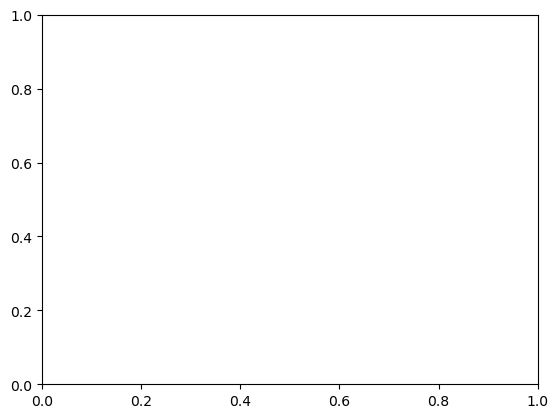

In [186]:
fig, ax = plt.subplots()

# Plot means as circles
ax.scatter(df["Categories"], df["Means"], s=200, alpha=0.7, label='Mean', color='lightblue')

# Plot standard deviations as transparent circles
for i, row in df.iterrows():
    ax.scatter(row["Categories"], row["Means"], s=2*row["Std_Dev"]**2, alpha=0.2, color='blue')

# Add error bars (standard deviations)
ax.errorbar(df["Categories"], df["Means"], yerr=df["Std_Dev"], fmt='o', color='blue', alpha=0.5)

# Add labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Means')
ax.set_title('Mean Values with Standard Deviations')

# Show legend
ax.legend()

# Show plot
plt.show()

In [13]:
means_by_group_df["Pref_value"] = means_by_group_df["Pref_value"].astype(float)
means_by_group_df["STD"] = means_by_group_df["STD"].astype(float)

In [14]:
means_by_group_df

,Pref_value,Mean,STD,Message_pref
Message_pref,,,,
BigWords,-0.263158,23.68,4.91,Big Words
Conversation,-0.032468,46.75,4.03,Conversational Tone
Drives,0.149351,64.94,3.86,Drives
Social,-0.045455,45.45,4.03,Social Processes
acquire,-0.004854,49.51,4.95,Acquire
allure,-0.043624,45.64,4.09,Allure
cogproc,-0.025424,47.46,4.62,Cognitive Processes
curiosity,-0.212963,28.70,4.37,Curiosity
emo_neg,-0.181818,31.82,3.77,Negative Emotion


In [15]:
import sys
!{sys.executable} -m pip install matplotlib

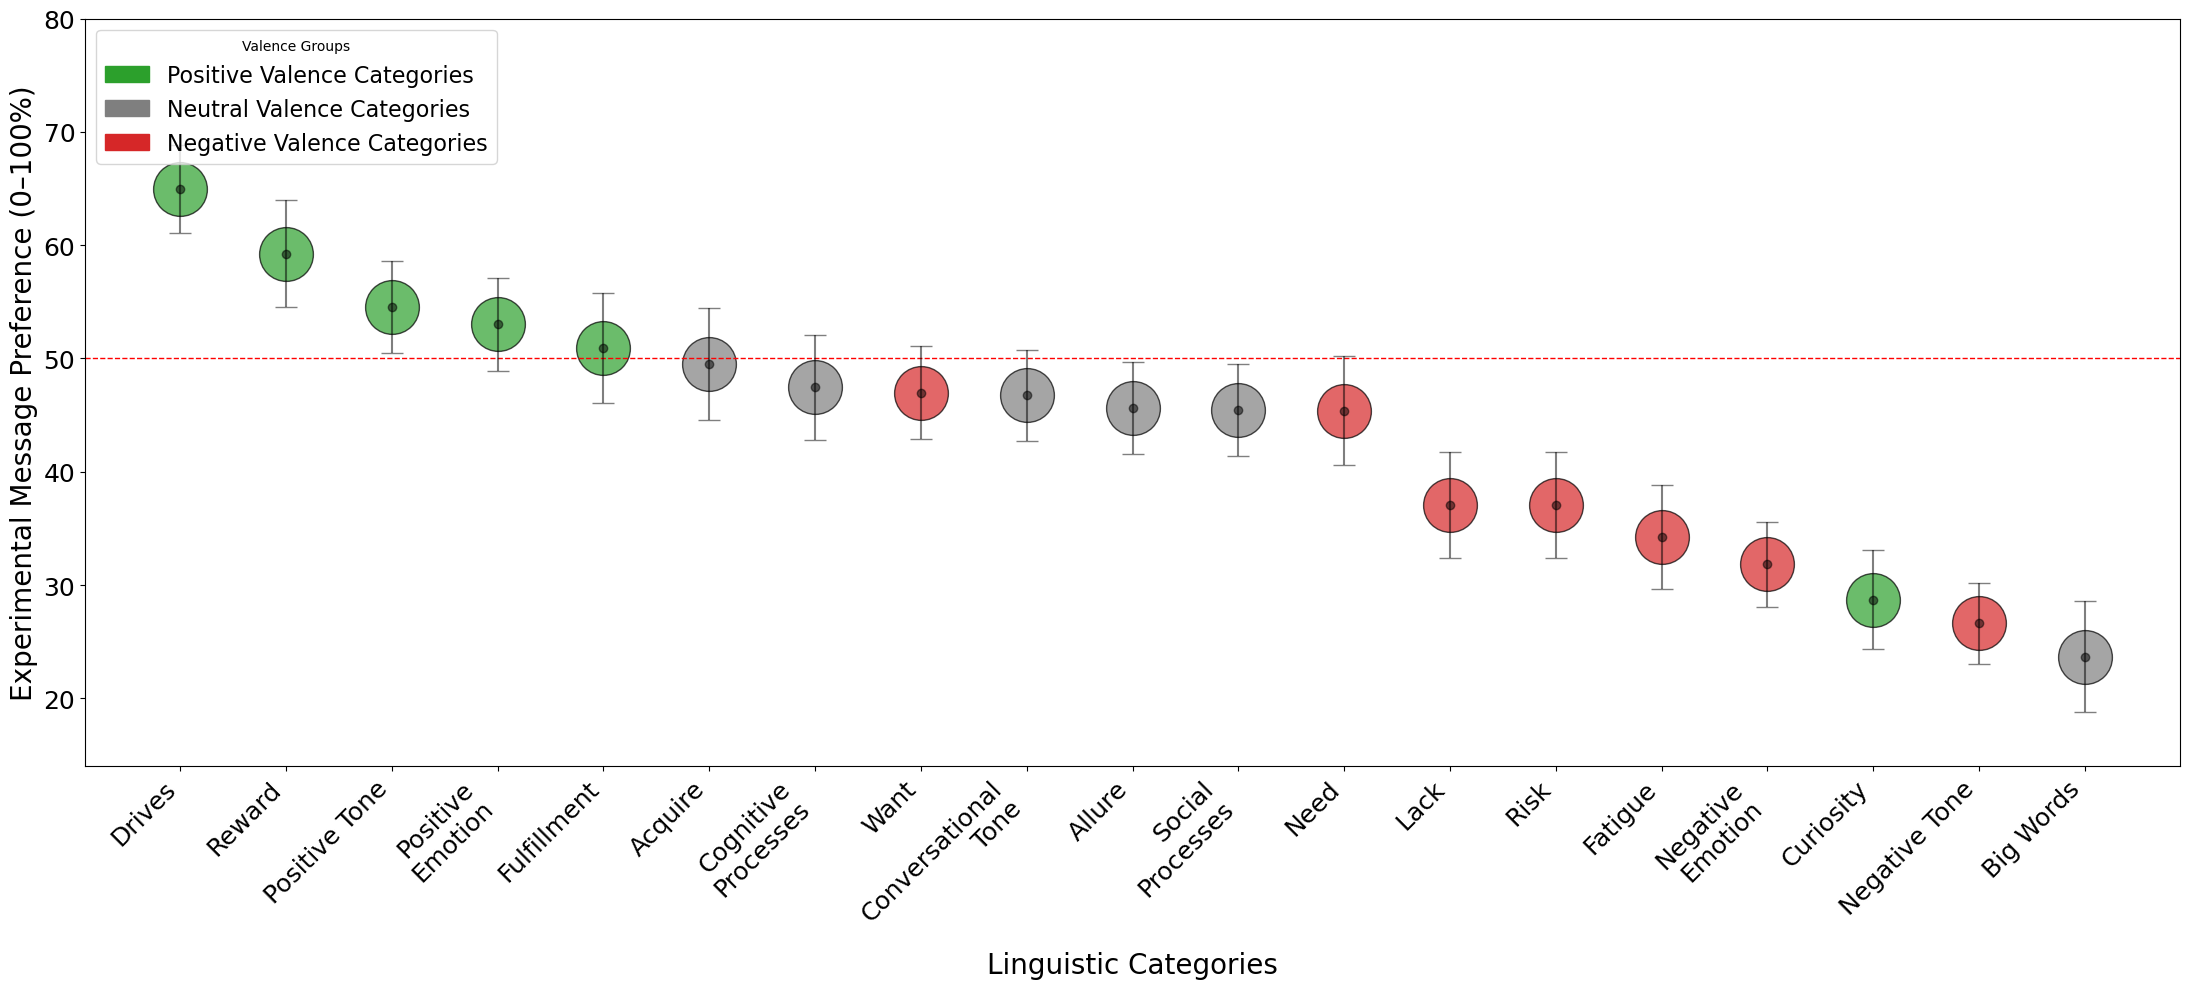

In [34]:
import matplotlib.pyplot as plt
import textwrap
import matplotlib.patches as mpatches

# Define category valence groups
positive_valence = ['Drives', 'Positive Tone', 'Curiosity', 'Positive Emotion', 'Fulfillment', 'Reward']
neutral_valence = ['Big Words', 'Conversational Tone', 'Social Processes', 'Acquire', 'Allure', 'Cognitive Processes']
negative_valence = ['Negative Emotion', 'Fatigue', 'Lack', 'Need','Risk', 'Negative Tone', 'Want']

# Assign color map
color_map = {
    'positive': 'tab:green',
    'neutral': 'tab:gray',
    'negative': 'tab:red'
}

# Add a valence column to your dataframe
def assign_valence(cat):
    if cat in positive_valence:
        return 'positive'
    elif cat in neutral_valence:
        return 'neutral'
    elif cat in negative_valence:
        return 'negative'
    else:
        return 'other'

means_by_group_df['valence'] = means_by_group_df['Message_pref'].apply(assign_valence)

# Sort by Mean descending
means_by_group_df_sorted = means_by_group_df.sort_values(by='Mean', ascending=False)
desired_order = means_by_group_df_sorted['Message_pref'].tolist()

# Map category names to numeric x positions
category_to_x = {cat: i for i, cat in enumerate(desired_order)}

# Create the plot
fig, ax = plt.subplots(figsize=(22, 10))

# Plot each dot
for idx, row in means_by_group_df_sorted.iterrows():
    x = category_to_x[row['Message_pref']]
    y = row['Mean']
    valence = row['valence']
    color = color_map.get(valence, 'gray')
    

    ax.scatter(x, y, s=1500, alpha=0.7, color=color, edgecolors='k')

# Add horizontal baseline
ax.axhline(y=50, color='red', linestyle='--', linewidth=1)

# Add error bars
x_positions = means_by_group_df_sorted["Message_pref"].map(category_to_x)
ax.errorbar(x_positions, means_by_group_df_sorted["Mean"],
            yerr=means_by_group_df_sorted["STD"], fmt='o', color='black',
            alpha=0.5, capsize=8)

# Set x-axis
wrapped_labels = [textwrap.fill(label, width=14) for label in desired_order]
ax.set_xticks(range(len(desired_order)))
ax.set_xticklabels(wrapped_labels, rotation=45, ha='right')

# Y-axis and labels
ax.set_ylim(14, 80)
ax.set_ylabel('Experimental Message Preference (0–100%)', fontsize=20)
ax.set_xlabel('Linguistic Categories', fontsize=20)

# Custom valence legend
legend_patches = [
    mpatches.Patch(color=color_map['positive'], label='Positive Valence Categories'),
    mpatches.Patch(color=color_map['neutral'], label='Neutral Valence Categories'),
    mpatches.Patch(color=color_map['negative'], label='Negative Valence Categories')
]
ax.legend(handles=legend_patches, loc='upper left', prop={'size': 16}, title='Valence Groups')

# Save and show
ax.tick_params(axis='x', labelsize=18)  # or any size you prefer
ax.tick_params(axis='y', labelsize=18)
plt.tight_layout()
plt.savefig("message_preferences_sorted_colored.png", dpi=300, bbox_inches='tight')
plt.show()

In [26]:
plt.savefig("message_preferences_sorted_colored.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

C:\Users\77197jsc\AppData\Local\Temp\ipykernel_1656\962387037.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped_labels, rotation=45, ha='right')


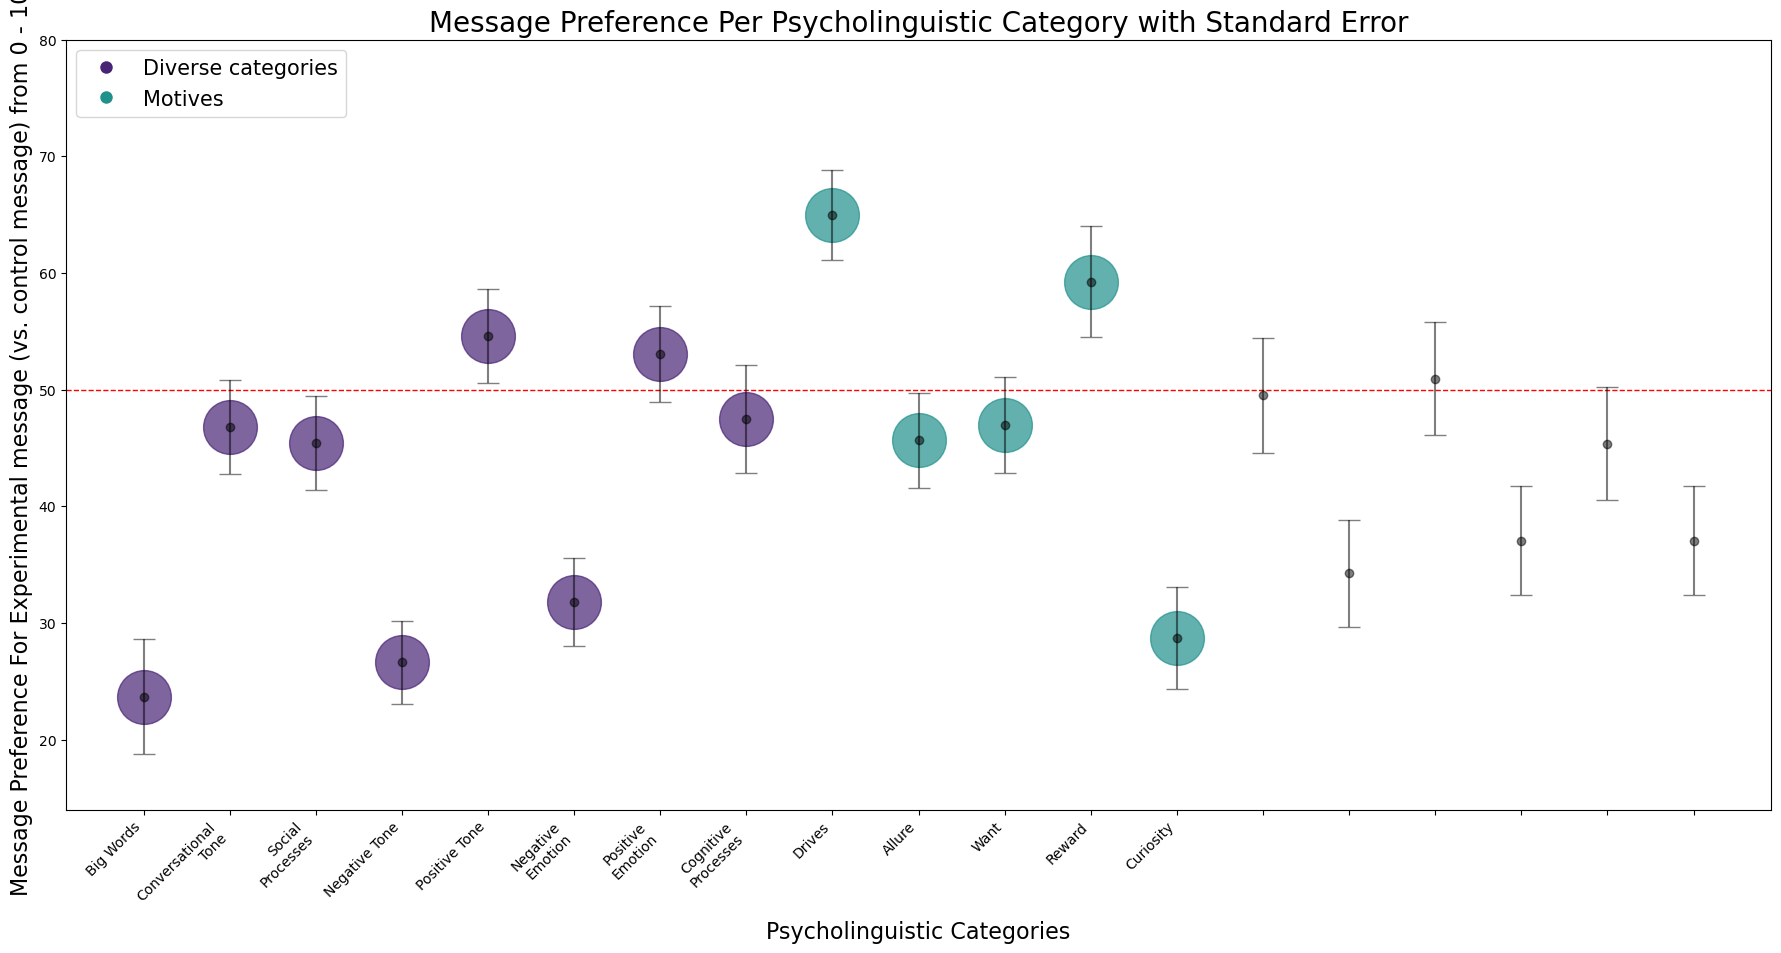

In [20]:
import textwrap  # Import the textwrap module

# Define the desired order of categories
desired_order = ["Big Words", "Conversational Tone", "Social Processes", "Negative Tone", 
                 "Positive Tone", "Negative Emotion", "Positive Emotion", "Cognitive Processes", 
                 "Drives", "Allure",  "Want", "Reward", "Curiosity"]

# Create the plot with a wider figure
fig, ax = plt.subplots(figsize=(22, 10))  # Width doubled

# Get unique categories and their counts
unique_cats = means_by_group_df["Message_pref"].unique()
num_cats = len(unique_cats)

# Define colors for each category based on the specified groups
general_categories = ["Big Words", "Conversational Tone", "Social Processes", "Negative Tone", 
                      "Positive Tone", "Negative Emotion", "Positive Emotion", "Cognitive Processes"]
motives = ["Drives", "Allure", "Want", "Reward", "Curiosity"]

# Create a colormap with a gradient
cmap = plt.get_cmap('viridis')

# Plot means as circles with different colors for each "Linguistic_cat"
for i, cat in enumerate(desired_order):
    # Determine the color based on the category group
    if cat in general_categories:
        color = cmap(0.1)  # Color for general categories (at the beginning of the gradient)
    elif cat in motives:
        color = cmap(0.5)  # Color for motives (in the middle of the gradient)
    elif cat in states:
        color = cmap(0.9)  # Color for states (at the end of the gradient)
    
    ax.scatter(means_by_group_df.loc[means_by_group_df["Message_pref"] == cat, "Message_pref"],
               means_by_group_df.loc[means_by_group_df["Message_pref"] == cat, "Mean"],
               s=1500, alpha=0.7, label=cat, color=color)

# Plot thick horizontal line at value 50 on the Y-axis
ax.axhline(y=50, color='red', linestyle='--', linewidth=1)

# Add error bars based on standard deviations
ax.errorbar(means_by_group_df["Message_pref"], means_by_group_df["Mean"],
            yerr=means_by_group_df["STD"], fmt='o', color='black', alpha=0.5, capsize=8)

# Set y-axis limits to 0 and 100
ax.set_ylim(14, 80)

# Create legend labels for each category group
legend_labels = {"Diverse categories": cmap(0.1), "Motives": cmap(0.5)}

# Add legend with custom labels
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) 
           for label, color in legend_labels.items()]
ax.legend(handles=handles, labels=legend_labels.keys(), loc='upper left', prop={'size': 15})

# Wrap x-axis labels to encourage line breaks
wrapped_labels = [textwrap.fill(label, width=14) for label in desired_order]
ax.set_xticklabels(wrapped_labels, rotation=45, ha='right')

# Add labels and title
ax.set_ylabel('Message Preference For Experimental message (vs. control message) from 0 - 100%', fontsize=16)
ax.set_xlabel('Psycholinguistic Categories', fontsize=16)
ax.set_title('Message Preference Per Psycholinguistic Category with Standard Error', fontsize=20)
,
# Show plot
plt.show()

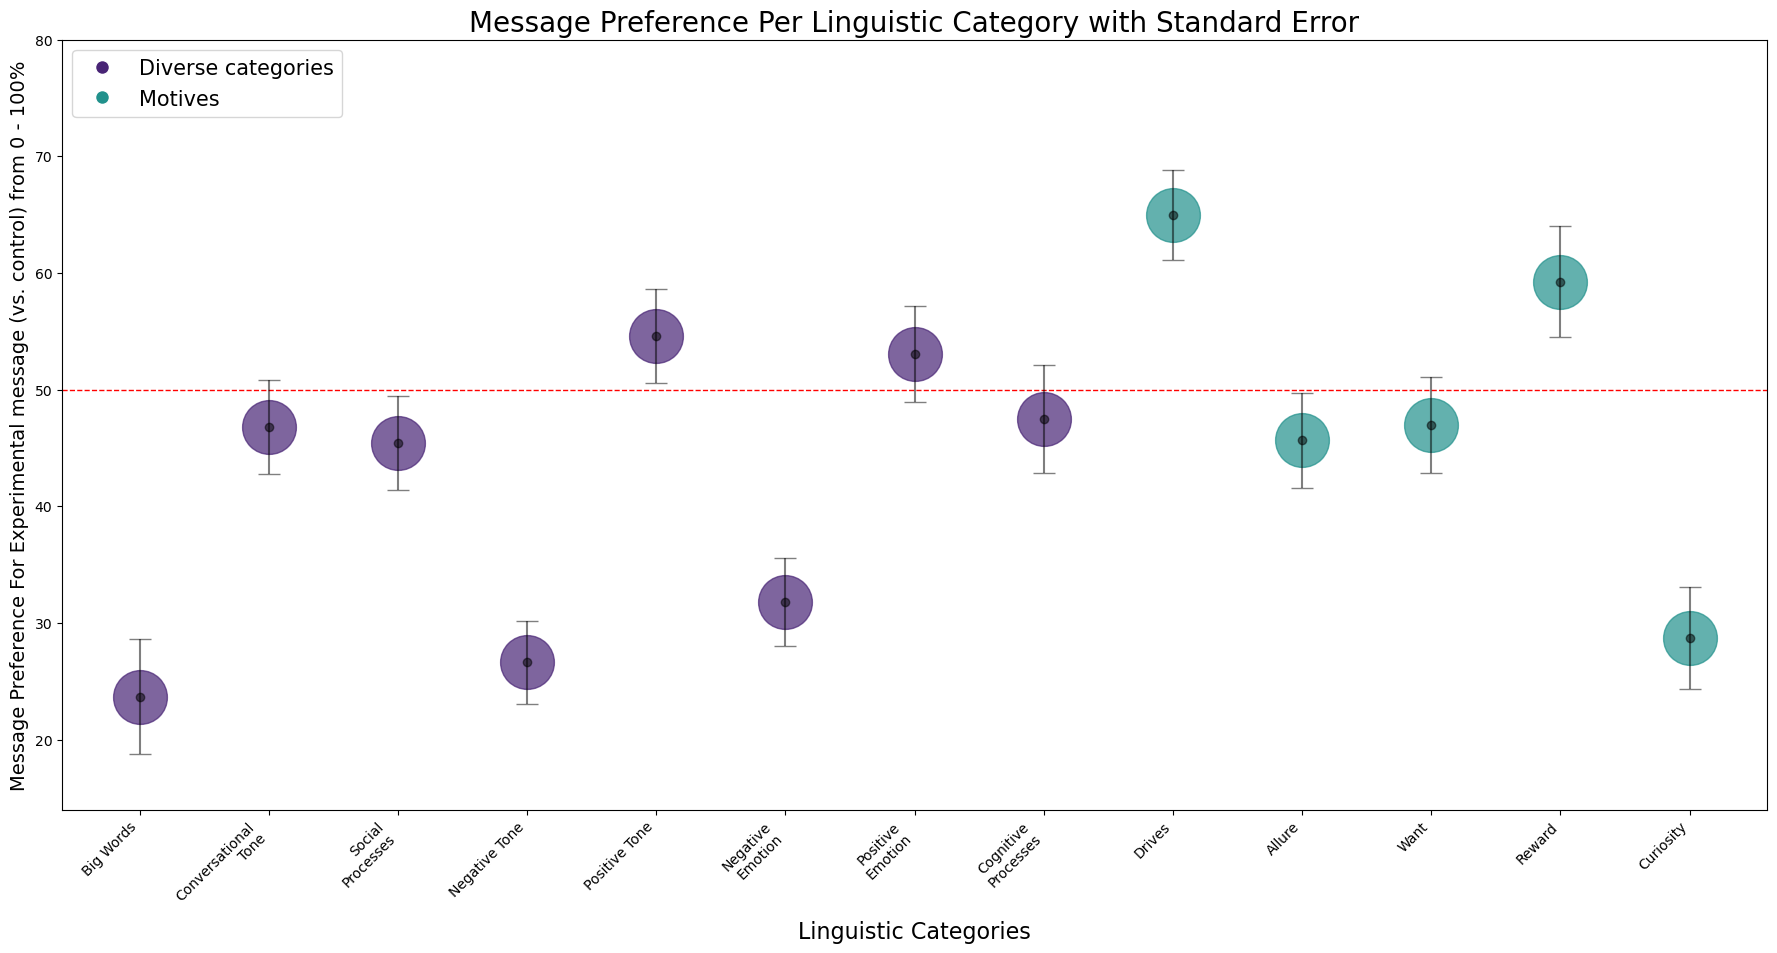

In [21]:
import textwrap

# Map category names to numeric x positions
category_to_x = {cat: i for i, cat in enumerate(desired_order)}

# Create the plot
fig, ax = plt.subplots(figsize=(22, 10))

# Plot data
for i, cat in enumerate(desired_order):
    if cat in general_categories:
        color = cmap(0.1)
    elif cat in motives:
        color = cmap(0.5)
    elif cat in states:
        color = cmap(0.9)
        
    x = category_to_x[cat]
    y = means_by_group_df.loc[means_by_group_df["Message_pref"] == cat, "Mean"]
    
    ax.scatter([x] * len(y), y, s=1500, alpha=0.7, label=cat, color=color)

# Horizontal line
ax.axhline(y=50, color='red', linestyle='--', linewidth=1)

# Error bars
means = means_by_group_df["Mean"]
errors = means_by_group_df["STD"]
x_positions = means_by_group_df["Message_pref"].map(category_to_x)
ax.errorbar(x_positions, means, yerr=errors, fmt='o', color='black', alpha=0.5, capsize=8)

# Set x-axis ticks and labels
wrapped_labels = [textwrap.fill(label, width=14) for label in desired_order]
ax.set_xticks(range(len(desired_order)))
ax.set_xticklabels(wrapped_labels, rotation=45, ha='right')

# Y-axis and labels
ax.set_ylim(14, 80)
ax.set_ylabel('Message Preference For Experimental message (vs. control) from 0 - 100%', fontsize=14)
ax.set_xlabel('Linguistic Categories', fontsize=16)
ax.set_title('Message Preference Per Linguistic Category with Standard Error', fontsize=20)

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) 
           for label, color in legend_labels.items()]
ax.legend(handles=handles, labels=legend_labels.keys(), loc='upper left', prop={'size': 15})
plt.savefig("message_preferences.png", dpi=300, bbox_inches='tight')
plt.show()

In [221]:
plt.savefig("message_preferences.png", dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline  # This makes plots appear directly in the notebook

UsageError: unrecognized arguments: # This makes plots appear directly in the notebook


In [357]:

# Print the means by group
with pd.option_context('display.max_rows', None):
    display(means_by_group_df),
    display(means_by_sex),
    display(std_by_group),
    display(values)
    

,Message_choice,Mean,STD,Linguistic_cat
Linguistic_cat,,,,
BigWords,-0.170213,32.98,0.472657,Big Words
Conversation,-0.051402,44.86,0.499691,Conversational Tone
Drives,0.135514,63.55,0.483551,Drives
Emoji,NaN,NaN,NaN,Emoji
Social,-0.041284,45.87,0.500594,Social Processes
acquire,-0.047619,45.24,0.503761,Acquire
allure,-0.023810,47.62,0.501140,Allure
cogproc,-0.052846,44.72,0.499233,Cognitive Processes
curiosity,-0.219626,28.04,0.451296,Curiosity


Sex    Linguistic_cat
Man    BigWords         -0.108696
       Conversation     -0.112245
       Drives            0.112245
       Social           -0.060000
       acquire          -0.269231
       allure           -0.109375
       cogproc          -0.017241
       curiosity        -0.132653
       emo_neg          -0.173469
       emo_pos          -0.042373
       fatigue          -0.096154
       fulfill          -0.009434
       lack             -0.160377
       need             -0.134615
       reward           -0.066038
       risk              0.000000
       tone_neg         -0.193878
       tone_pos         -0.010204
       want             -0.156250
Other  BigWords         -0.500000
       Conversation     -0.500000
       Drives           -0.166667
       Social            0.166667
       acquire                NaN
       allure           -0.500000
       cogproc          -0.500000
       curiosity        -0.166667
       emo_neg           0.166667
       emo_pos           0

Linguistic_cat
BigWords        0.472657
Conversation    0.499691
Drives          0.483551
Emoji                NaN
Social          0.500594
acquire         0.503761
allure          0.501140
cogproc         0.499233
curiosity       0.451296
emo_neg         0.471363
emo_pos         0.500983
fatigue         0.494877
fulfill         0.497932
lack            0.473286
need            0.499290
reward          0.486796
risk            0.490153
tone_neg        0.435031
tone_pos        0.501277
want            0.501698
Name: Message_choice, dtype: float64

Linguistic_cat
tone_neg        25.00
curiosity       28.04
emo_neg         32.71
BigWords        32.98
lack            33.33
risk            39.23
fatigue         41.60
fulfill         43.65
cogproc         44.72
need            44.80
Conversation    44.86
acquire         45.24
Social          45.87
allure          47.62
want            49.66
emo_pos         53.23
tone_pos        53.27
reward          62.20
Drives          63.55
Emoji             NaN
Name: Mean, dtype: float64

In [151]:
from tabulate import tabulate

data = means_by_group_df.values.tolist()

# Get column headers
headers = means_by_group_df.columns.tolist()

# Print the DataFrame in APA style
print(tabulate(data, headers=headers, tablefmt='pipe', numalign='center', stralign='center'))

|  Message_choice  |
|:----------------:|
|      -0.25       |
|    -0.219626     |
|    -0.172897     |
|    -0.170213     |
|    -0.166667     |
|    -0.107692     |
|      -0.084      |
|    -0.0634921    |
|    -0.0528455    |
|      -0.052      |
|    -0.0514019    |
|    -0.047619     |
|    -0.0412844    |
|    -0.0238095    |
|   -0.00340136    |
|    0.0322581     |
|    0.0327103     |
|     0.122047     |
|     0.135514     |
|       nan        |


In [124]:

# List of values to filter out
#values_to_keep = ['BigWords', 'tone_pos', 'tone_neg', 'emo_pos', 'Emoji', 'emo_neg',
       'Social', 'cogproc', 'want', 'Conversation',
       'Drives', 'allure']


# Create a new column by copying only the desired values
#final_small['Linguistic_cat_filtered'] = final_small['Linguistic_cat'].where(final_small['Linguistic_cat'].isin(values_to_keep))

# Drop rows where the new column is NaN (i.e., rows with values not in the list of desired values)
#final_small.dropna(subset=['Linguistic_cat_filtered'], inplace=True)

# Reset index if needed
#final_small.reset_index(drop=True, inplace=True)

In [ ]:
std_values

In [ ]:
#final_small.to_csv("final_filtered.csv", encoding='utf-8', index=False)

# LIWC Final analysis

In [377]:
import pandas as pd

In [433]:
# Reading in the LIWC results
results_liwc = pd.read_csv('C:/Users/77197jsc/OneDrive - Erasmus University Rotterdam/Documents/Study 3/Data/whatsdata_january_2024/liwc_final2.csv')

In [434]:
len(results_liwc)

191

In [435]:
results_liwc.head()

,Movez_code,Message,Number of messages,No_char,No_words,Message_en,Message_checked,School_mail,Segment,WPS,BigWords,Drives,cogproc,tone_pos,tone_neg,emo_pos,emo_neg,Social,need,want,acquire,lack,fulfill,fatigue,reward,risk,curiosity,allure,Conversation
0,1016110.0,Maar voel weer goed dus kan miegen weer pesten...,26,2098,389,But feel good again so can bully miegen again;...,But feel good again so can bully miegen again;...,d.holterman@wpkeesboeke.nl,1,122.67,8.42,4.08,12.77,3.53,1.09,0.82,0.54,11.14,2.17,1.36,0.27,0.54,0.00,0.27,0.00,0.00,0.00,10.33,3.80
1,1049218.0,Je ben al 00 min aan het kakken; Broer schiet ...,551,4494,794,Hahahaha isg; Lekka; You've been pooping for 0...,Hahahaha isg; Lekka; You've been pooping for 0...,l113319@gsr.nl,1,60.00,13.10,3.21,10.71,3.45,0.95,0.95,0.48,10.71,0.83,0.24,0.36,0.00,0.12,0.00,0.00,0.12,0.00,10.24,2.62
2,1054448.0,welke kleur heb jij van de jumbo highliter?; m...,591,145160,12172,what colour do you have from the jumbo highlit...,what colour do you have from the jumbo highlit...,l.bloembergen@wpkeesboeke.nl,1,67.41,14.43,2.97,12.19,2.10,1.18,0.58,0.73,11.24,4.96,0.46,0.79,0.38,0.09,0.12,0.02,0.13,0.15,8.15,2.26
3,1065025.0,Ja leuk bij wie; Ik kan vanaf 00 uur; Kan ook ...,7,600,112,Yeah nice with who; I can from 00:; Can do lat...,Yeah nice with who; I can from 00:; Can do lat...,w.ebben@wpkeesboeke.nl,1,67.50,9.63,2.96,11.85,5.93,2.22,0.74,0.74,10.37,1.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.37,4.44
4,1065863.0,Wanneer ben jij op school?; Ik ben om 0.00 ong...,729,63199,1683,When will you be at school; I'll be there at 0...,When will you be at school; I'll be there at 0...,134349@wolfert.nl,1,30.20,12.32,2.65,10.99,1.19,0.53,0.26,0.40,12.19,0.26,0.26,0.66,0.13,0.00,0.00,0.13,0.00,0.13,7.28,1.19


In [436]:
results_liwc.columns

Index(['Movez_code', 'Message', 'Number of messages', 'No_char', 'No_words',
       'Message_en', 'Message_checked', 'School_mail', 'Segment', 'WPS',
       'BigWords', 'Drives', 'cogproc', 'tone_pos', 'tone_neg', 'emo_pos',
       'emo_neg', 'Social', 'need', 'want', 'acquire', 'lack', 'fulfill',
       'fatigue', 'reward', 'risk', 'curiosity', 'allure', 'Conversation'],
      dtype='object')

In [437]:
liwc_long = pd.melt(results_liwc, id_vars=['Movez_code', 'Message', 'No_char', "No_words", 'Number of messages', 'Message_en',
       'Segment',], value_vars=['BigWords', 'Drives', 'cogproc', 'tone_pos',
       'tone_neg', 'emo_pos', 'emo_neg', 'Social', 'need', 'want', 'acquire',
       'lack', 'fulfill', 'fatigue', 'reward', 'risk', 'curiosity', 'allure',
       'Conversation'], var_name = "Message_pref", value_name="LIWC")

In [438]:
len(liwc_long)

3629

In [439]:
#Creating standardized values for all LIWC scores

results_liwc["BigWords_z"] = (results_liwc["BigWords"] - results_liwc["BigWords"].mean()) / results_liwc["BigWords"].std()
results_liwc["Drives_z"] = (results_liwc["Drives"] - results_liwc["Drives"].mean()) / results_liwc["Drives"].std()
results_liwc["cogproc_z"] = (results_liwc["cogproc"] - results_liwc["cogproc"].mean()) / results_liwc["cogproc"].std()
results_liwc["tone_pos_z"] = (results_liwc["tone_pos"] - results_liwc["tone_pos"].mean()) / results_liwc["tone_pos"].std()
results_liwc["tone_neg_z"] = (results_liwc["tone_neg"] - results_liwc["tone_neg"].mean()) / results_liwc["tone_neg"].std()
results_liwc["emo_pos_z"] = (results_liwc["emo_pos"] - results_liwc["emo_pos"].mean()) / results_liwc["emo_pos"].std()
results_liwc["emo_neg_z"] = (results_liwc["emo_neg"] - results_liwc["emo_neg"].mean()) / results_liwc["emo_neg"].std()
results_liwc["Social_z"] = (results_liwc["Social"] - results_liwc["Social"].mean()) / results_liwc["Social"].std()
results_liwc["need_z"] = (results_liwc["need"] - results_liwc["need"].mean()) / results_liwc["need"].std()
results_liwc["want_z"] = (results_liwc["want"] - results_liwc["want"].mean()) / results_liwc["want"].std()
results_liwc["acquire_z"] = (results_liwc["acquire"] - results_liwc["acquire"].mean()) / results_liwc["acquire"].std()
results_liwc["lack_z"] = (results_liwc["lack"] - results_liwc["lack"].mean()) / results_liwc["lack"].std()
results_liwc["fulfill_z"] = (results_liwc["fulfill"] - results_liwc["fulfill"].mean()) / results_liwc["fulfill"].std()
results_liwc["fatigue_z"] = (results_liwc["fatigue"] - results_liwc["fatigue"].mean()) / results_liwc["fatigue"].std()
results_liwc["curiosity_z"] = (results_liwc["curiosity"] - results_liwc["curiosity"].mean()) / results_liwc["curiosity"].std()
results_liwc["reward_z"] = (results_liwc["reward"] - results_liwc["reward"].mean()) / results_liwc["WPS"].std()
results_liwc["risk_z"] = (results_liwc["risk"] - results_liwc["risk"].mean()) / results_liwc["risk"].std()
results_liwc["allure_z"] = (results_liwc["allure"] - results_liwc["allure"].mean()) / results_liwc["allure"].std()
results_liwc["Conversation_z"] = (results_liwc["Conversation"] - results_liwc["Conversation"].mean()) / results_liwc["Conversation"].std()

In [440]:
#From there we can create a new variable psycholinguistic distance (je größer der Wer, desto größer die Distanz)
results_liwc["match_Drives"] = 15.38 - results_liwc["Drives"]
results_liwc["match_cogproc"] = 15.38 - results_liwc["cogproc"]
results_liwc["match_tone_pos"] = 16 - results_liwc["tone_pos"]
results_liwc["match_tone_neg"] = 16.67 - results_liwc["tone_neg"]
results_liwc["match_emo_pos"] = 16 - results_liwc["emo_pos"]
results_liwc["match_emo_neg"] = 16 - results_liwc["emo_neg"]
results_liwc["match_Social"] = 14.81 - results_liwc["Social"]
results_liwc["match_need"] = 14.81 - results_liwc["need"]
results_liwc["match_want"] = 15.38 - results_liwc["want"]
results_liwc["match_acquire"] = 15.38 - results_liwc["acquire"]
results_liwc["match_lack"] = 14.81 - results_liwc["lack"]
results_liwc["match_fulfill"] = 16.00 - results_liwc["fulfill"]
results_liwc["match_fatigue"] = 14.81 - results_liwc["fatigue"]
results_liwc["match_reward"] = 14.81 - results_liwc["reward"]
results_liwc["match_risk"] = 15.38 - results_liwc["risk"]
results_liwc["match_curiosity"] = 16 - results_liwc["curiosity"]
results_liwc["match_allure"] = 16 - results_liwc["allure"]
results_liwc["match_WPS"] = 43 - results_liwc["WPS"]
results_liwc["match_Conversation"] = 14.81 - results_liwc["Conversation"]
results_liwc["match_BigWords"] = 21.74 - results_liwc["BigWords"]
results_liwc["match_intensity"] = 20.00 - results_liwc["tone_pos"]


In [441]:
#From there we can create a new variable psycholinguistic distance (je größer der Wer, desto größer die Distanz)
results_liwc["match_Drives_ctr"] = 0 - results_liwc["Drives"]
results_liwc["match_cogproc_ctr"] = 0 - results_liwc["cogproc"]
results_liwc["match_tone_pos_ctr"] = 0 - results_liwc["tone_pos"]
results_liwc["match_tone_neg_ctr"] = 0 - results_liwc["tone_neg"]
results_liwc["match_emo_pos_ctr"] = 0 - results_liwc["emo_pos"]
results_liwc["match_emo_neg_ctr"] = 0 - results_liwc["emo_neg"]
results_liwc["match_Social_ctr"] = 0 - results_liwc["Social"]
results_liwc["match_need_ctr"] = 0 - results_liwc["need"]
results_liwc["match_want_ctr"] = 0 - results_liwc["want"]
results_liwc["match_acquire_ctr"] = 3.85 - results_liwc["acquire"]
results_liwc["match_lack_ctr"] = 0 - results_liwc["lack"]
results_liwc["match_fulfill_ctr"] = 0 - results_liwc["fulfill"]
results_liwc["match_fatigue_ctr"] = 0 - results_liwc["fatigue"]
results_liwc["match_reward_ctr"] = 0 - results_liwc["reward"]
results_liwc["match_risk_ctr"] = 0 - results_liwc["risk"]
results_liwc["match_curiosity_ctr"] = 0 - results_liwc["curiosity"]
results_liwc["match_allure_ctr"] = 0 - results_liwc["allure"]
results_liwc["match_WPS_ctr"] = 8.33 - results_liwc["WPS"]
results_liwc["match_Conversation_ctr"] = 0 - results_liwc["Conversation"]
results_liwc["match_BigWords_ctr"] = 0 - results_liwc["BigWords"]
results_liwc["match_intensity_ctr"] = 7.69 - results_liwc["tone_pos"]

In [442]:
results_liwc

,Movez_code,Message,Number of messages,No_char,No_words,Message_en,Message_checked,School_mail,Segment,WPS,BigWords,Drives,cogproc,tone_pos,tone_neg,emo_pos,emo_neg,Social,need,want,acquire,lack,fulfill,fatigue,reward,risk,curiosity,allure,Conversation,BigWords_z,Drives_z,cogproc_z,tone_pos_z,tone_neg_z,emo_pos_z,emo_neg_z,Social_z,need_z,want_z,acquire_z,lack_z,fulfill_z,fatigue_z,curiosity_z,reward_z,risk_z,allure_z,Conversation_z,match_Drives,match_cogproc,match_tone_pos,match_tone_neg,match_emo_pos,match_emo_neg,match_Social,match_need,match_want,match_acquire,match_lack,match_fulfill,match_fatigue,match_reward,match_risk,match_curiosity,match_allure,match_WPS,match_Conversation,match_BigWords,match_intensity,match_Drives_ctr,match_cogproc_ctr,match_tone_pos_ctr,match_tone_neg_ctr,match_emo_pos_ctr,match_emo_neg_ctr,match_Social_ctr,match_need_ctr,match_want_ctr,match_acquire_ctr,match_lack_ctr,match_fulfill_ctr,match_fatigue_ctr,match_reward_ctr,match_risk_ctr,match_curiosity_ctr,match_allure_ctr,match_WPS_ctr,match_Conversation_ctr,match_BigWords_ctr,match_intensity_ctr
0,1016110.0,Maar voel weer goed dus kan miegen weer pesten...,26,2098,389,But feel good again so can bully miegen again;...,But feel good again so can bully miegen again;...,d.holterman@wpkeesboeke.nl,1,122.67,8.42,4.08,12.77,3.53,1.09,0.82,0.54,11.14,2.17,1.36,0.27,0.54,0.00,0.27,0.00,0.00,0.00,10.33,3.80,-0.930892,0.491975,4.276222e-01,0.250530,0.233819,-0.124302,0.149469,-0.313929,1.608656,2.375659,-1.365876,0.955517,-0.866444,2.087278,-0.951666,-0.000857,-0.874711,0.340442,0.376205,11.30,2.61,12.47,15.58,15.18,15.46,3.67,12.64,14.02,15.11,14.27,16.00,14.54,14.81,15.38,16.00,5.67,-79.67,11.01,13.32,16.47,-4.08,-12.77,-3.53,-1.09,-0.82,-0.54,-11.14,-2.17,-1.36,3.58,-0.54,0.00,-0.27,0.00,0.00,0.00,-10.33,-114.34,-3.80,-8.42,4.16
1,1049218.0,Je ben al 00 min aan het kakken; Broer schiet ...,551,4494,794,Hahahaha isg; Lekka; You've been pooping for 0...,Hahahaha isg; Lekka; You've been pooping for 0...,l113319@gsr.nl,1,60.00,13.10,3.21,10.71,3.45,0.95,0.95,0.48,10.71,0.83,0.24,0.36,0.00,0.12,0.00,0.00,0.12,0.00,10.24,2.62,1.320598,-0.103925,-3.880275e-01,0.192032,-0.019004,0.037630,-0.021140,-0.496077,-0.518214,-0.846717,-1.115483,-1.106672,1.195747,-0.703516,-0.951666,-0.000857,0.064323,0.297597,-0.336189,12.17,4.67,12.55,15.72,15.05,15.52,4.10,13.98,15.14,15.02,14.81,15.88,14.81,14.81,15.26,16.00,5.76,-17.00,12.19,8.64,16.55,-3.21,-10.71,-3.45,-0.95,-0.95,-0.48,-10.71,-0.83,-0.24,3.49,0.00,-0.12,0.00,0.00,-0.12,0.00,-10.24,-51.67,-2.62,-13.10,4.24
2,1054448.0,welke kleur heb jij van de jumbo highliter?; m...,591,145160,12172,what colour do you have from the jumbo highlit...,what colour do you have from the jumbo highlit...,l.bloembergen@wpkeesboeke.nl,1,67.41,14.43,2.97,12.19,2.10,1.18,0.58,0.73,11.24,4.96,0.46,0.79,0.38,0.09,0.12,0.02,0.13,0.15,8.15,2.26,1.960445,-0.268311,1.979732e-01,-0.795119,0.396349,-0.423253,0.689729,-0.271569,6.036988,-0.213751,0.080843,0.344498,0.680199,0.536837,-0.168182,-0.000567,0.142576,-0.697360,-0.553529,12.41,3.19,13.90,15.49,15.42,15.27,3.57,9.85,14.92,14.59,14.43,15.91,14.69,14.79,15.25,15.85,7.85,-24.41,12.55,7.31,17.90,-2.97,-12.19,-2.10,-1.18,-0.58,-0.73,-11.24,-4.96,-0.46,3.06,-0.38,-0.09,-0.12,-0.02,-0.13,-0.15,-8.15,-59.08,-2.26,-14.43,5.59
3,1065025.0,Ja leuk bij wie; Ik kan vanaf 00 uur; Kan ook ...,7,600,112,Yeah nice with who; I can from 00:; Can do lat...,Yeah nice with who; I can from 00:; Can do lat...,w.ebben@wpkeesboeke.nl,1,67.50,9.63,2.96,11.85,5.93,2.22,0.74,0.74,10.37,1.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.37,4.44,-0.348776,-0.275160,6.335143e-02,2.005467,2.274467,-0.223952,0.718164,-0.640100,0.513477,-1.537226,-2.117057,-1.106672,-0.866444,-0.703516,-0.951666,-0.000857,-0.874711,0.359485,0.762589,12.42,3.53,10.07,14.45,15.26,15.26,4.44,13.33,15.38,15.38,14.81,16.00,14.81,14.81,15.38,16.00,5.63,-24.50,10.37,12.11,14.07,-2.96,-11.85,-5.93,-2.22,-0.74,-0.74,-10.37,-1.48,0.00,3.85,0.00,0.00,0.00

In [443]:
results_liwc["expmsg_Drives"] = 15.38
results_liwc["expmsg_cogproc"] = 15.38
results_liwc["expmsg_tone_pos"] = 16
results_liwc["expmsg_tone_neg"] = 16.67
results_liwc["expmsg_emo_pos"] = 16
results_liwc["expmsg_emo_neg"] = 16
results_liwc["expmsg_Social"] = 14.81
results_liwc["expmsg_need"] = 14.81
results_liwc["expmsg_want"] = 15.38
results_liwc["expmsg_acquire"] = 15.38
results_liwc["expmsg_lack"] = 14.81
results_liwc["expmsg_fulfill"] = 16.00
results_liwc["expmsg_fatigue"] = 14.81
results_liwc["expmsg_reward"] = 14.81
results_liwc["expmsg_risk"] = 15.38
results_liwc["expmsg_curiosity"] = 16
results_liwc["expmsg_allure"] = 16
results_liwc["expmsg_WPS"] = 14.33
results_liwc["expmsg_Conversation"] = 14.81
results_liwc["expmsg_BigWords"] = 21.74
results_liwc["expmsg_intensity"] = 20.00

results_liwc["ctrmsg_Drives"] = 0
results_liwc["ctrmsg_cogproc"] = 0
results_liwc["ctrmsg_tone_pos"] = 0
results_liwc["ctrmsg_tone_neg"] = 0
results_liwc["ctrmsg_emo_pos"] = 0
results_liwc["ctrmsg_emo_neg"] = 0
results_liwc["ctrmsg_Social"] = 0
results_liwc["ctrmsg_need"] = 0
results_liwc["ctrmsg_want"] = 0
results_liwc["ctrmsg_acquire"] = 3.85
results_liwc["ctrmsg_lack"] = 0
results_liwc["ctrmsg_fulfill"] = 0
results_liwc["ctrmsg_fatigue"] = 0
results_liwc["ctrmsg_reward"] = 0
results_liwc["ctrmsg_risk"] = 0
results_liwc["ctrmsg_curiosity"] = 0
results_liwc["ctrmsg_allure"] = 0
results_liwc["ctrmsg_WPS"] = 8.33
results_liwc["ctrmsg_Conversation"] = 0
results_liwc["ctrmsg_BigWords"] = 0
results_liwc["ctrmsg_intensity"] = 7.69

C:\Users\77197jsc\AppData\Local\Temp\ipykernel_31568\2628417468.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  results_liwc["ctrmsg_curiosity"] = 0
C:\Users\77197jsc\AppData\Local\Temp\ipykernel_31568\2628417468.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  results_liwc["ctrmsg_allure"] = 0
C:\Users\77197jsc\AppData\Local\Temp\ipykernel_31568\2628417468.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider jo

In [444]:
list(results_liwc.columns)

['Movez_code',
 'Message',
 'Number of messages',
 'No_char',
 'No_words',
 'Message_en',
 'Message_checked',
 'School_mail',
 'Segment',
 'WPS',
 'BigWords',
 'Drives',
 'cogproc',
 'tone_pos',
 'tone_neg',
 'emo_pos',
 'emo_neg',
 'Social',
 'need',
 'want',
 'acquire',
 'lack',
 'fulfill',
 'fatigue',
 'reward',
 'risk',
 'curiosity',
 'allure',
 'Conversation',
 'BigWords_z',
 'Drives_z',
 'cogproc_z',
 'tone_pos_z',
 'tone_neg_z',
 'emo_pos_z',
 'emo_neg_z',
 'Social_z',
 'need_z',
 'want_z',
 'acquire_z',
 'lack_z',
 'fulfill_z',
 'fatigue_z',
 'curiosity_z',
 'reward_z',
 'risk_z',
 'allure_z',
 'Conversation_z',
 'match_Drives',
 'match_cogproc',
 'match_tone_pos',
 'match_tone_neg',
 'match_emo_pos',
 'match_emo_neg',
 'match_Social',
 'match_need',
 'match_want',
 'match_acquire',
 'match_lack',
 'match_fulfill',
 'match_fatigue',
 'match_reward',
 'match_risk',
 'match_curiosity',
 'match_allure',
 'match_WPS',
 'match_Conversation',
 'match_BigWords',
 'match_intensity',
 '

In [445]:
# Lets have a first look at the mean values

print("WPS", results_liwc["WPS"].mean())
print("BigWords", results_liwc["BigWords"].mean())
print("Drives", results_liwc["Drives"].mean())
print("cogproc", results_liwc["cogproc"].mean())
print("tone_pos", results_liwc["tone_pos"].mean())
print("tone_neg", results_liwc["tone_neg"].mean())
print("emo_pos", results_liwc["emo_pos"].mean())
print("emo_neg", results_liwc["emo_neg"].mean())
print("Social", results_liwc["Social"].mean())
print("need", results_liwc["need"].mean())
print("want", results_liwc["want"].mean())
print("acquire", results_liwc["acquire"].mean())
print("lack", results_liwc["lack"].mean())
print("fulfill", results_liwc["fulfill"].mean())
print("fatigue", results_liwc["fatigue"].mean())
print("curiosity", results_liwc["curiosity"].mean())
print("reward", results_liwc["reward"].mean())
print("risk", results_liwc["risk"].mean())
print("allure", results_liwc["allure"].mean())
print("Conversation", results_liwc["Conversation"].mean())


WPS 79.31884816753927
BigWords 10.354973821989528
Drives 3.361727748691099
cogproc 11.690000000000003
tone_pos 3.1873821989528794
tone_neg 0.960523560209424
emo_pos 0.9197905759162304
emo_neg 0.487434554973822
Social 11.88109947643979
need 1.1564921465968587
want 0.5342931937172776
acquire 0.7609424083769634
lack 0.28979057591623036
fulfill 0.05041884816753926
fatigue 0.06806282722513089
curiosity 0.18219895287958113
reward 0.05916230366492146
risk 0.11178010471204189
allure 9.614869109947643
Conversation 3.176858638743455


In [446]:
# Finally we can merge the school dataframe with the LIWC dataframe
results_liwc["Movez_code"] = results_liwc["Movez_code"].astype(float)
all_schools_final2["Movez_code"] = all_schools_final2["Movez_code"].astype(float)

In [447]:
# Merging on either 'Movez_code' or 'School_mail'
complete_df = pd.merge(all_schools_final2, results_liwc, how='inner', on='School_mail')

In [448]:
len(complete_df)

171

In [449]:
complete_df["intensity_y"] = complete_df["tone_pos_y"]
complete_df = complete_df.rename(columns={"intensity": "intensity_x"})

In [450]:
print(len(complete_df))

171


In [451]:
list(complete_df.columns)

['StartDate_left',
 'EndDate_left',
 'Status_left',
 'Progress_left',
 'Duration (in seconds)_left',
 'Finished_left',
 'RecordedDate_left',
 'ResponseId_left',
 'DistributionChannel_left',
 'UserLanguage_left',
 'School_mail',
 'ID_name',
 'Insta_check',
 'Sex',
 'Sex_5_TEXT',
 'Gender',
 'Gender_7_TEXT',
 'Date_of_birth',
 'FAS_computer',
 'FAS_car',
 'FAS_bathroom',
 'FAS_vacation',
 'FAS_ownroom',
 'FAS_dishwasher',
 'Phone_OS',
 'Phone_OS_3_TEXT',
 'Whats_check',
 'Nomination_class_1',
 'Nomination_class_2',
 'Nomination_class_3',
 'Nomination_class_4',
 'Nomination_class_5',
 'IPAddress',
 'Progress_right',
 'RecipientLastName',
 'RecipientFirstName',
 'RecipientEmail',
 'ExternalReference',
 'LocationLatitude',
 'LocationLongitude',
 'Mes_pref_posemo_C',
 'Mes_pref_posemo_E',
 'eff_posemo',
 'pp_posemo',
 'Mes_pref_allure_C',
 'Mes_pref_allure_E',
 'eff_allure',
 'pp_allure',
 'Mes_pref_cog_C',
 'Mes_pref_cog_E',
 'eff_cog',
 'pp_cog',
 'Mes_pref_acquire_E',
 'Mes_pref_acquire_C

In [452]:
#complete_df.to_csv("complete_df.csv")

In [453]:
complete_df["Message_choice_mean"] = complete_df[["cogproc_x", "emo_pos_x", "emo_neg_x", "allure_x", "acquire_x", "BigWords_x", "want_x", "WPS_x", "Social_x", "risk_x", "reward_x", "tone_pos_x", "tone_neg_x", "need_x", "lack_x", "fatigue_x", "Drives_x", "curiosity_x", "Conversation_x", "fulfill_x", "intensity_x"]].mean(axis=1)

In [454]:
import sys
!{sys.executable} -m pip install textblob
from textblob import TextBlob

Defaulting to user installation because normal site-packages is not writeable


In [455]:
def get_sentiment_scores(text):
    blob = TextBlob(text)
    return pd.Series({'Intensity': blob.sentiment.polarity, 'Subjectivity': blob.sentiment.subjectivity})

In [456]:
complete_df[['Sentiment', 'Subjectivity']] = complete_df['Message_checked'].apply(get_sentiment_scores)

In [457]:
# List of column names to process
columns = [
    "cogproc", "emo_pos", "emo_neg", "allure", "acquire", "BigWords", "want", "WPS",
    "Social", "risk", "reward", "tone_pos", "tone_neg", "need", "lack", "fatigue",
    "Drives", "curiosity", "Conversation", "fulfill", "intensity"
]

# Loop through each column to compute the new values
for col in columns:
    # Construct the column names for the experimental and control messages
    expmsg_col = f"expmsg_{col}"
    ctrmsg_col = f"ctrmsg_{col}"
    original_col = f"{col}_x"
    LIWC_col = f"{col}_y"
    
    # Define the new column name
    new_col = f"{col}_chosenmatch"
    
    # Compute the new column based on the condition
    complete_df[new_col] = complete_df.apply(
        lambda row: (
            abs(row[expmsg_col] - row[LIWC_col]) if row[original_col] == 1 else
            abs(row[ctrmsg_col] - row[LIWC_col]) if row[original_col] == 0 else
            np.nan
        ),
        axis=1
    )

In [458]:
complete_df.columns

Index(['StartDate_left', 'EndDate_left', 'Status_left', 'Progress_left',
       'Duration (in seconds)_left', 'Finished_left', 'RecordedDate_left',
       'ResponseId_left', 'DistributionChannel_left', 'UserLanguage_left',
       ...
       'tone_pos_chosenmatch', 'tone_neg_chosenmatch', 'need_chosenmatch',
       'lack_chosenmatch', 'fatigue_chosenmatch', 'Drives_chosenmatch',
       'curiosity_chosenmatch', 'Conversation_chosenmatch',
       'fulfill_chosenmatch', 'intensity_chosenmatch'],
      dtype='object', length=356)

In [459]:
complete_df["Chosen_message_mean"] = complete_df[[ 'cogproc_chosenmatch', 'emo_pos_chosenmatch','emo_neg_chosenmatch','allure_chosenmatch','acquire_chosenmatch','BigWords_chosenmatch','want_chosenmatch','WPS_chosenmatch','Social_chosenmatch','risk_chosenmatch','reward_chosenmatch','tone_pos_chosenmatch','tone_neg_chosenmatch','need_chosenmatch','lack_chosenmatch','fatigue_chosenmatch','Drives_chosenmatch','curiosity_chosenmatch','Conversation_chosenmatch','fulfill_chosenmatch','intensity_chosenmatch']].mean(axis=1)

In [460]:
complete_df[complete_df["Movez_code_x"] == 1016110.0]

,StartDate_left,EndDate_left,Status_left,Progress_left,Duration (in seconds)_left,Finished_left,RecordedDate_left,ResponseId_left,DistributionChannel_left,UserLanguage_left,School_mail,ID_name,Insta_check,Sex,Sex_5_TEXT,Gender,Gender_7_TEXT,Date_of_birth,FAS_computer,FAS_car,FAS_bathroom,FAS_vacation,FAS_ownroom,FAS_dishwasher,Phone_OS,Phone_OS_3_TEXT,Whats_check,Nomination_class_1,Nomination_class_2,Nomination_class_3,Nomination_class_4,Nomination_class_5,IPAddress,Progress_right,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,Mes_pref_posemo_C,Mes_pref_posemo_E,eff_posemo,pp_posemo,Mes_pref_allure_C,Mes_pref_allure_E,eff_allure,pp_allure,Mes_pref_cog_C,Mes_pref_cog_E,eff_cog,pp_cog,Mes_pref_acquire_E,Mes_pref_acquire_C,eff_acquire,pp_acquire,Mes_pref_want_C,Mes_pref_want_E,eff_want,pp_want,Mes_pref_social_C,Mes_pref_social_E,eff_social,pp_social,Mes_pref_risk_E,Mes_pref_risk_C,eff_risk,pp_risk,Mes_pref_reward_C,Mes_pref_reward_E,eff_reward,pp_reward,Mes_pref_postone_E,Mes_pref_postone_C,eff_postone,pp_postone,Mes_pref_negemo_C,Mes_pref_negemo_E,eff_negemo,pp_negemo,Mes_pref_negtone_E,Mes_pref_negtone_C,eff_negtone,pp_negtone,Mes_pref_need_E,Mes_pref_need_C,eff_need,pp_need,Mes_pref_lack_C,Mes_pref_lack_E,eff_lack,pp_lack,Mes_pref_fullfill_C,Mes_pref_fullfill_E,eff_fulfill,pp_fulfill,Mes_pref_fatigue_E,Mes_pref_fatigue_C,eff_fatigue,pp_fatigue,Mes_pref_drive_C,Mes_pref_drive_E,eff_drive,pp_drive,Mes_pref_curious_E,Mes_pref_curious_C,eff_curious,pp_curious,Mes_pref_convers_E,Mes_pref_convers_C,eff_convers,pp_convers,Similarity_1,Similarity_2,Suggestion_box,Number,Movez_code_x,school,Mes_eff_cog_1,Mes_eff_cog_2,Mes_pref_bigwords_E,Mes_pref_bigwords_C,eff_bigwords,pp_bigwords,Mes_pref_WPS_E,Mes_pref_WPS_C,eff_WPS,pp_WPS,Number_left,Mes_pref_subj_E,Mes_pref_subj_C,eff_subj,pp_subj,Mes_pref_intensity_E,Mes_pref_intensity_C,eff_intensity,pp_intensity,Cons_1,Cons_2,Cons_3,Cons_4,Cons_5,Cons_6,Cons_spec,Number_right,Klas,ID_name1,Mes_pref_big_1,Mes_pref_big_2,Mes_eff_big_1,Mes_eff_big_2,Sharing_behavior,Sharing_context1,Sharing_context2,Sharing_context3,Self_eff1,Self_eff2,Perc_control1,Perc_control2,Perc_control3,self_eff1,self_eff2,self_eff3,Perc_sev1,Perc_sev2,Perc_sev3,Res_Part1,Res_Part2,Aut_eval1,Aut_eval2,Aut_eval3,Aut_eval4,Open field,FAS,Date_of_birth2,age,cogproc_x,emo_pos_x,emo_neg_x,allure_x,acquire_x,BigWords_x,WPS_x,want_x,subj,Social_x,risk_x,reward_x,tone_pos_x,tone_neg_x,need_x,lack_x,fatigue_x,Drives_x,curiosity_x,Conversation_x,fulfill_x,intensity_x,Pref_value_mean,Similarity_mean,Movez_code_y,Message,Number of messages,No_char,No_words,Message_en,Message_checked,Segment,WPS_y,BigWords_y,Drives_y,cogproc_y,tone_pos_y,tone_neg_y,emo_pos_y,emo_neg_y,Social_y,need_y,want_y,acquire_y,lack_y,fulfill_y,fatigue_y,reward_y,risk_y,curiosity_y,allure_y,Conversation_y,BigWords_z,Drives_z,cogproc_z,tone_pos_z,tone_neg_z,emo_pos_z,emo_neg_z,Social_z,need_z,want_z,acquire_z,lack_z,fulfill_z,fatigue_z,curiosity_z,reward_z,risk_z,allure_z,Conversation_z,match_Drives,match_cogproc,match_tone_pos,match_tone_neg,match_emo_pos,match_emo_neg,match_Social,match_need,match_want,match_acquire,match_lack,match_fulfill,match_fatigue,match_reward,match_risk,match_curiosity,match_allure,match_WPS,match_Conversation,match_BigWords,match_intensity,match_Drives_ctr,match_cogproc_ctr,match_tone_pos_ctr,match_tone_neg_ctr,match_emo_pos_ctr,match_emo_neg_ctr,match_Social_ctr,match_need_ctr,match_want_ctr,match_acquire_ctr,match_lack_ctr,match_fulfill_ctr,match_fatigue_ctr,match_reward_ctr,match_risk_ctr,match_curiosity_ctr,match_allure_ctr,match_WPS_ctr,match_Conversation_ctr,match_BigWords_ctr,match_intensity_ctr,expmsg_Drives,expmsg_cogproc,expmsg_tone_pos,expmsg_tone_neg,expmsg_emo_pos,expmsg_emo_neg,expmsg_Social,expmsg_need,expmsg_want,expmsg_acquire,expmsg_lack,expmsg_fulfill,expmsg_fatigue,expmsg_reward,expmsg_risk,expmsg_curiosity,expmsg_allure,expmsg_WPS,expmsg_Conversation,expmsg_Bi

In [461]:
list(complete_df.columns)

['StartDate_left',
 'EndDate_left',
 'Status_left',
 'Progress_left',
 'Duration (in seconds)_left',
 'Finished_left',
 'RecordedDate_left',
 'ResponseId_left',
 'DistributionChannel_left',
 'UserLanguage_left',
 'School_mail',
 'ID_name',
 'Insta_check',
 'Sex',
 'Sex_5_TEXT',
 'Gender',
 'Gender_7_TEXT',
 'Date_of_birth',
 'FAS_computer',
 'FAS_car',
 'FAS_bathroom',
 'FAS_vacation',
 'FAS_ownroom',
 'FAS_dishwasher',
 'Phone_OS',
 'Phone_OS_3_TEXT',
 'Whats_check',
 'Nomination_class_1',
 'Nomination_class_2',
 'Nomination_class_3',
 'Nomination_class_4',
 'Nomination_class_5',
 'IPAddress',
 'Progress_right',
 'RecipientLastName',
 'RecipientFirstName',
 'RecipientEmail',
 'ExternalReference',
 'LocationLatitude',
 'LocationLongitude',
 'Mes_pref_posemo_C',
 'Mes_pref_posemo_E',
 'eff_posemo',
 'pp_posemo',
 'Mes_pref_allure_C',
 'Mes_pref_allure_E',
 'eff_allure',
 'pp_allure',
 'Mes_pref_cog_C',
 'Mes_pref_cog_E',
 'eff_cog',
 'pp_cog',
 'Mes_pref_acquire_E',
 'Mes_pref_acquire_C

In [462]:
len(complete_df)

171

In [514]:
complete_df_short = complete_df[["Movez_code_x", "Sex", "Gender", "age", "FAS", "Message_choice_mean", "Chosen_message_mean", "Similarity_mean"]]

In [515]:
complete_df_short["Chosen_message_mean100"] = 100 - complete_df_short["Chosen_message_mean"]

C:\Users\77197jsc\AppData\Local\Temp\ipykernel_31568\3258288400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_df_short["Chosen_message_mean100"] = 100 - complete_df_short["Chosen_message_mean"]


In [516]:
complete_df_short['Sex'] = complete_df_short['Sex'].map({'Vrouw': 2, 'Man': 1}).fillna(0).astype(int)

C:\Users\77197jsc\AppData\Local\Temp\ipykernel_31568\3481665684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_df_short['Sex'] = complete_df_short['Sex'].map({'Vrouw': 2, 'Man': 1}).fillna(0).astype(int)


In [517]:
complete_df_short.to_csv("complete_wide_small.csv", encoding='utf-8', index=False)

In [467]:
print(complete_df["Movez_code_x"].nunique())

print(pivoted["Movez_code_x"].nunique())

170
170


In [468]:
id_counts = melted.groupby("Movez_code_x")["value"].count()
print(id_counts.describe())

count    170.000000
mean      21.123529
std        1.610626
min       21.000000
25%       21.000000
50%       21.000000
75%       21.000000
max       42.000000
Name: value, dtype: float64


In [469]:
pivoted.head(100)

,Movez_code_x,Linguistic Category,Similarity: EXP,Similarity: EXP_100
0,1016110.0,BigWords,13.32,86.68
1,1016110.0,Conversation,11.01,88.99
2,1016110.0,Drives,11.30,88.70
3,1016110.0,Social,3.67,96.33
4,1016110.0,WPS,-79.67,179.67
5,1016110.0,acquire,15.11,84.89
6,1016110.0,allure,5.67,94.33
7,1016110.0,cogproc,2.61,97.39
8,1016110.0,curiosity,16.00,84.00
9,1016110.0,emo_neg,15.46,84.54


In [470]:
complete_df.head()

,StartDate_left,EndDate_left,Status_left,Progress_left,Duration (in seconds)_left,Finished_left,RecordedDate_left,ResponseId_left,DistributionChannel_left,UserLanguage_left,School_mail,ID_name,Insta_check,Sex,Sex_5_TEXT,Gender,Gender_7_TEXT,Date_of_birth,FAS_computer,FAS_car,FAS_bathroom,FAS_vacation,FAS_ownroom,FAS_dishwasher,Phone_OS,Phone_OS_3_TEXT,Whats_check,Nomination_class_1,Nomination_class_2,Nomination_class_3,Nomination_class_4,Nomination_class_5,IPAddress,Progress_right,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,Mes_pref_posemo_C,Mes_pref_posemo_E,eff_posemo,pp_posemo,Mes_pref_allure_C,Mes_pref_allure_E,eff_allure,pp_allure,Mes_pref_cog_C,Mes_pref_cog_E,eff_cog,pp_cog,Mes_pref_acquire_E,Mes_pref_acquire_C,eff_acquire,pp_acquire,Mes_pref_want_C,Mes_pref_want_E,eff_want,pp_want,Mes_pref_social_C,Mes_pref_social_E,eff_social,pp_social,Mes_pref_risk_E,Mes_pref_risk_C,eff_risk,pp_risk,Mes_pref_reward_C,Mes_pref_reward_E,eff_reward,pp_reward,Mes_pref_postone_E,Mes_pref_postone_C,eff_postone,pp_postone,Mes_pref_negemo_C,Mes_pref_negemo_E,eff_negemo,pp_negemo,Mes_pref_negtone_E,Mes_pref_negtone_C,eff_negtone,pp_negtone,Mes_pref_need_E,Mes_pref_need_C,eff_need,pp_need,Mes_pref_lack_C,Mes_pref_lack_E,eff_lack,pp_lack,Mes_pref_fullfill_C,Mes_pref_fullfill_E,eff_fulfill,pp_fulfill,Mes_pref_fatigue_E,Mes_pref_fatigue_C,eff_fatigue,pp_fatigue,Mes_pref_drive_C,Mes_pref_drive_E,eff_drive,pp_drive,Mes_pref_curious_E,Mes_pref_curious_C,eff_curious,pp_curious,Mes_pref_convers_E,Mes_pref_convers_C,eff_convers,pp_convers,Similarity_1,Similarity_2,Suggestion_box,Number,Movez_code_x,school,Mes_eff_cog_1,Mes_eff_cog_2,Mes_pref_bigwords_E,Mes_pref_bigwords_C,eff_bigwords,pp_bigwords,Mes_pref_WPS_E,Mes_pref_WPS_C,eff_WPS,pp_WPS,Number_left,Mes_pref_subj_E,Mes_pref_subj_C,eff_subj,pp_subj,Mes_pref_intensity_E,Mes_pref_intensity_C,eff_intensity,pp_intensity,Cons_1,Cons_2,Cons_3,Cons_4,Cons_5,Cons_6,Cons_spec,Number_right,Klas,ID_name1,Mes_pref_big_1,Mes_pref_big_2,Mes_eff_big_1,Mes_eff_big_2,Sharing_behavior,Sharing_context1,Sharing_context2,Sharing_context3,Self_eff1,Self_eff2,Perc_control1,Perc_control2,Perc_control3,self_eff1,self_eff2,self_eff3,Perc_sev1,Perc_sev2,Perc_sev3,Res_Part1,Res_Part2,Aut_eval1,Aut_eval2,Aut_eval3,Aut_eval4,Open field,FAS,Date_of_birth2,age,cogproc_x,emo_pos_x,emo_neg_x,allure_x,acquire_x,BigWords_x,WPS_x,want_x,subj,Social_x,risk_x,reward_x,tone_pos_x,tone_neg_x,need_x,lack_x,fatigue_x,Drives_x,curiosity_x,Conversation_x,fulfill_x,intensity_x,Pref_value_mean,Similarity_mean,Movez_code_y,Message,Number of messages,No_char,No_words,Message_en,Message_checked,Segment,WPS_y,BigWords_y,Drives_y,cogproc_y,tone_pos_y,tone_neg_y,emo_pos_y,emo_neg_y,Social_y,need_y,want_y,acquire_y,lack_y,fulfill_y,fatigue_y,reward_y,risk_y,curiosity_y,allure_y,Conversation_y,BigWords_z,Drives_z,cogproc_z,tone_pos_z,tone_neg_z,emo_pos_z,emo_neg_z,Social_z,need_z,want_z,acquire_z,lack_z,fulfill_z,fatigue_z,curiosity_z,reward_z,risk_z,allure_z,Conversation_z,match_Drives,match_cogproc,match_tone_pos,match_tone_neg,match_emo_pos,match_emo_neg,match_Social,match_need,match_want,match_acquire,match_lack,match_fulfill,match_fatigue,match_reward,match_risk,match_curiosity,match_allure,match_WPS,match_Conversation,match_BigWords,match_intensity,match_Drives_ctr,match_cogproc_ctr,match_tone_pos_ctr,match_tone_neg_ctr,match_emo_pos_ctr,match_emo_neg_ctr,match_Social_ctr,match_need_ctr,match_want_ctr,match_acquire_ctr,match_lack_ctr,match_fulfill_ctr,match_fatigue_ctr,match_reward_ctr,match_risk_ctr,match_curiosity_ctr,match_allure_ctr,match_WPS_ctr,match_Conversation_ctr,match_BigWords_ctr,match_intensity_ctr,expmsg_Drives,expmsg_cogproc,expmsg_tone_pos,expmsg_tone_neg,expmsg_emo_pos,expmsg_emo_neg,expmsg_Social,expmsg_need,expmsg_want,expmsg_acquire,expmsg_lack,expmsg_fulfill,expmsg_fatigue,expmsg_reward,expmsg_risk,expmsg_curiosity,expmsg_allure,expmsg_WPS,expmsg_Conversation,expmsg_Bi

In [471]:
# Define the list of linguistic categories (original columns)
columns = [
    "cogproc", "emo_pos", "emo_neg", "allure", "acquire", "BigWords", "want", "WPS",
    "Social", "risk", "reward", "tone_pos", "tone_neg", "need", "lack", "fatigue",
    "Drives", "curiosity", "Conversation", "fulfill", "intensity"
]

# Prefix and participant ID columns
prefix = "match_"
id_columns = ["Movez_code_x", "Sex", "Gender", "age", "FAS"]

# Step 1: Filter for columns that match exact prefix + category, and not ending in _ctr
value_vars = [
    col for col in complete_df.columns
    for cat in columns
    if col.startswith(f"{prefix}{cat}") and not col.endswith("_ctr")
]

# Remove accidental duplicates
value_vars = list(set(value_vars))

print(f"✅ Filtered value_vars (columns to melt): {len(value_vars)}")
# Optional: print(value_vars)

# Step 2: Melt dataframe
melted = complete_df.melt(
    id_vars=id_columns,
    value_vars=value_vars,
    var_name="column",
    value_name="value"
)

print(f"📊 Melted dataframe shape: {melted.shape}")  # Expecting ~171*21 = 3591

# Step 3: Extract linguistic category
def extract_category(col_name):
    for cat in columns:
        if col_name.startswith(f"{prefix}{cat}"):
            return cat
    return None

melted["Linguistic Category"] = melted["column"].apply(extract_category)

# Step 4: Check for unmatched categories
missing = melted[melted["Linguistic Category"].isna()]
print(f"⚠️ Rows with no matched category: {len(missing)}")
if not missing.empty:
    print(missing.head())

# Step 5: Check for duplicates before pivot
dupes = melted.duplicated(subset=id_columns + ["Linguistic Category"])
print(f"⚠️ Duplicate participant-category combinations before pivot: {dupes.sum()}")

# Step 6: Pivot table using participant ID only (avoid accidental over-indexing)
pivoted = melted.pivot_table(
    index=["Movez_code_x", "Linguistic Category"],
    values="value",
    aggfunc="first",
    dropna=False
).reset_index()

pivoted.columns.name = None

print(f"✅ Final pivoted shape: {pivoted.shape}")  # Should be (171*21 = 3591, 3)

pivoted.columns.name = None

print(f"✅ Final pivoted shape: {pivoted.shape}")  # Should be 171 * 21 = 3591


✅ Filtered value_vars (columns to melt): 21
📊 Melted dataframe shape: (3591, 7)
⚠️ Rows with no matched category: 0
⚠️ Duplicate participant-category combinations before pivot: 21
✅ Final pivoted shape: (3570, 3)
✅ Final pivoted shape: (3570, 3)


In [472]:
# Define the list of linguistic categories (original columns)
columns = [
    "cogproc", "emo_pos", "emo_neg", "allure", "acquire", "BigWords", "want", "WPS",
    "Social", "risk", "reward", "tone_pos", "tone_neg", "need", "lack", "fatigue",
    "Drives", "curiosity", "Conversation", "fulfill", "intensity"
]

# Suffix and participant ID columns
suffix = "_x"
id_columns = ["Movez_code_x", "Sex", "Gender", "age", "FAS"]

# Step 1: Filter columns that match exact category + suffix, and not ending in '_ctr'
value_vars = [
    col for col in complete_df.columns
    if any(col == f"{cat}{suffix}" for cat in columns) and not col.endswith("_ctr")
]

# Remove duplicates (just in case)
value_vars = list(set(value_vars))

print(f"✅ Filtered value_vars (columns to melt): {len(value_vars)}")
# Optional: print(value_vars)

# Step 2: Melt dataframe
melted2 = complete_df.melt(
    id_vars=id_columns,
    value_vars=value_vars,
    var_name="column",
    value_name="value"
)

print(f"📊 Melted dataframe shape: {melted2.shape}")  # Expecting ~171*21 = 3591

# Step 3: Extract linguistic category
def extract_category(col_name):
    for cat in columns:
        if col_name == f"{cat}{suffix}":
            return cat
    return None

melted2["Linguistic Category"] = melted2["column"].apply(extract_category)

# Step 4: Check for unmatched categories
missing = melted2[melted2["Linguistic Category"].isna()]
print(f"⚠️ Rows with no matched category: {len(missing)}")
if not missing.empty:
    print(missing.head())

# Step 5: Check for duplicates before pivot
dupes = melted2.duplicated(subset=id_columns + ["Linguistic Category"])
print(f"⚠️ Duplicate participant-category combinations before pivot: {dupes.sum()}")

# Step 6: Pivot table using participant ID only
pivoted2 = melted2.pivot_table(
    index=["Movez_code_x", "Linguistic Category"],
    values="value",
    aggfunc="first",
    dropna=False
).reset_index()

pivoted2.columns.name = None

print(f"✅ Final pivoted shape: {pivoted2.shape}")  # Should be 171 * 21 = 3591

✅ Filtered value_vars (columns to melt): 21
📊 Melted dataframe shape: (3591, 7)
⚠️ Rows with no matched category: 0
⚠️ Duplicate participant-category combinations before pivot: 21
✅ Final pivoted shape: (3570, 3)


In [474]:
message_pref = pivoted2

In [477]:
pivoted = pivoted.rename(columns={"value": "Similarity: EXP"}) 
message_pref = message_pref.rename(columns={"value": "Message_pref"})

In [411]:
pivoted["Linguistic Category"].value_counts()

Linguistic Category
BigWords        170
fatigue         170
tone_pos        170
tone_neg        170
risk            170
reward          170
need            170
lack            170
intensity       170
fulfill         170
emo_pos         170
Conversation    170
emo_neg         170
curiosity       170
cogproc         170
allure          170
acquire         170
WPS             170
Social          170
Drives          170
want            170
Name: count, dtype: int64

In [412]:
len(pivoted)

3570

In [478]:
participant_info.head()

,Movez_code_x,Sex,Gender,age,FAS
0,7001593.0,Man,Man,17.0,1.833333
1,3755626.0,Vrouw,Vrouw,16.0,2.000000
2,1527216.0,Man,"Omschrijf ik liever zelf, namelijk:",16.0,1.166667
3,5931444.0,Man,Man,16.0,1.333333
4,1349968.0,Vrouw,Vrouw,16.0,1.500000


In [484]:
message_pref.head()

,Movez_code_x,Linguistic Category,Message_pref
0,1016110.0,BigWords,0.0
1,1016110.0,Conversation,0.0
2,1016110.0,Drives,0.0
3,1016110.0,Social,1.0
4,1016110.0,WPS,0.0


In [487]:
# Step 1: Get participant-level info
participant_info = complete_df[["Movez_code_x", "Sex", "Gender", "age", "FAS"]].drop_duplicates()

# Step 2: Merge demographics directly into the long-format dataframe
pivoted_with_demo1 = pd.merge(pivoted, participant_info, on="Movez_code_x", how="left")
print(len(pivoted_with_demo1))
pivoted_with_demo2 = pd.merge(pivoted_with_demo1, message_pref, on=["Movez_code_x", "Linguistic Category"], how="left")
print(len(pivoted_with_demo2))

3570
3570


In [488]:
pivoted_with_demo.head()

,Movez_code_x,Linguistic Category_x,Similarity: EXP,Similarity: EXP_100,Sex,Gender,age,FAS,Linguistic Category_y,value
0,1016110.0,BigWords,13.32,86.68,Man,Man,14.0,1.833333,BigWords,0.0
1,1016110.0,BigWords,13.32,86.68,Man,Man,14.0,1.833333,Conversation,0.0
2,1016110.0,BigWords,13.32,86.68,Man,Man,14.0,1.833333,Drives,0.0
3,1016110.0,BigWords,13.32,86.68,Man,Man,14.0,1.833333,Social,1.0
4,1016110.0,BigWords,13.32,86.68,Man,Man,14.0,1.833333,WPS,0.0


In [489]:
pivoted_with_demo2["Similarity: EXP_100"] = 100 - pivoted_with_demo2["Similarity: EXP"]

In [490]:
len(pivoted)

3570

In [491]:
pivoted_with_demo2.to_csv("complete_df_EXPSIM4.csv")

In [152]:
list(complete_df.columns)

['StartDate_left',
 'EndDate_left',
 'Status_left',
 'Progress_left',
 'Duration (in seconds)_left',
 'Finished_left',
 'RecordedDate_left',
 'ResponseId_left',
 'DistributionChannel_left',
 'UserLanguage_left',
 'School_mail',
 'ID_name',
 'Insta_check',
 'Sex',
 'Sex_5_TEXT',
 'Gender',
 'Gender_7_TEXT',
 'Date_of_birth',
 'FAS_computer',
 'FAS_car',
 'FAS_bathroom',
 'FAS_vacation',
 'FAS_ownroom',
 'FAS_dishwasher',
 'Phone_OS',
 'Phone_OS_3_TEXT',
 'Whats_check',
 'Nomination_class_1',
 'Nomination_class_2',
 'Nomination_class_3',
 'Nomination_class_4',
 'Nomination_class_5',
 'IPAddress',
 'Progress_right',
 'RecipientLastName',
 'RecipientFirstName',
 'RecipientEmail',
 'ExternalReference',
 'LocationLatitude',
 'LocationLongitude',
 'Mes_pref_posemo_C',
 'Mes_pref_posemo_E',
 'eff_posemo',
 'pp_posemo',
 'Mes_pref_allure_C',
 'Mes_pref_allure_E',
 'eff_allure',
 'pp_allure',
 'Mes_pref_cog_C',
 'Mes_pref_cog_E',
 'eff_cog',
 'pp_cog',
 'Mes_pref_acquire_E',
 'Mes_pref_acquire_C

In [161]:
complete_df_eff.head()

,Movez_code_x,Sex,age,FAS,Gender,Linguistic category,Eff_value
0,7001593.0,Man,17.0,1.833333,Man,eff_WPS,NaN
1,3755626.0,Vrouw,16.0,2.000000,Vrouw,eff_WPS,NaN
2,1527216.0,Man,16.0,1.166667,"Omschrijf ik liever zelf, namelijk:",eff_WPS,NaN
3,5931444.0,Man,16.0,1.333333,Man,eff_WPS,NaN
4,1349968.0,Vrouw,16.0,1.500000,Vrouw,eff_WPS,NaN


In [345]:
complete_df_eff = pd.melt(complete_df, id_vars=['Movez_code_x', "Sex", "age", "FAS", "Gender"], value_vars = ['eff_WPS', 'eff_acquire', 'eff_allure', 'eff_bigwords', 'eff_cog', 'eff_convers', 'eff_curious', 'eff_drive', 'eff_fatigue', 'eff_fulfill', 'eff_intensity', 'eff_lack', 'eff_need', 'eff_negemo', 'eff_negtone', 'eff_posemo', 'eff_postone', 'eff_reward', 'eff_risk', 'eff_social', 'eff_subj', 'eff_want'],var_name= "Linguistic category", value_name='Eff_value')
complete_df_eff["Linguistic category"] = complete_df_eff["Linguistic category"].replace(['eff_WPS', 'eff_acquire', 'eff_allure', 'eff_bigwords', 'eff_cog', 'eff_convers', 'eff_curious', 'eff_drive', 'eff_fatigue', 'eff_fulfill', 'eff_intensity', 'eff_lack', 'eff_need', 'eff_negemo', 'eff_negtone', 'eff_posemo', 'eff_postone', 'eff_reward', 'eff_risk', 'eff_social', 'eff_subj', 'eff_want'], ['WPS', 'acquire', 'allure', 'BigWords', "cogproc", 'Conversation', 'curiosity', 'Drives', 'fatigue', "fulfill", 'intensity', 'lack', 'need', 'emo_neg', 'tone_neg', 'emo_pos', 'tone_pos', 'reward', 'risk', "Social", "subj", "want"])
complete_df_eff = complete_df_eff[complete_df_eff["Movez_code_x"].isna() == False]
complete_df_eff = complete_df_eff[complete_df_eff["Eff_value"].isna() == False]

In [346]:
complete_df_eff.head(20)

,Movez_code_x,Sex,age,FAS,Gender,Linguistic category,Eff_value
30,3504199.0,Man,NaN,2.000000,Man,WPS,2
40,9089051.0,Vrouw,14.0,1.000000,Vrouw,WPS,1
46,6989421.0,Man,15.0,1.000000,Man,WPS,1
51,1054448.0,Vrouw,15.0,1.500000,Vrouw,WPS,4
56,2141126.0,Man,14.0,2.000000,Man,WPS,3
57,5110502.0,Vrouw,14.0,2.000000,Vrouw,WPS,5
62,5959570.0,Vrouw,NaN,1.833333,Vrouw,WPS,2
63,9574541.0,Man,14.0,1.500000,Man,WPS,2
64,7913427.0,Vrouw,15.0,1.000000,Vrouw,WPS,4
65,9235593.0,Vrouw,14.0,1.666667,Vrouw,WPS,1


In [347]:
complete_df = complete_df.rename(columns= {"eff_bigwords": 'eff_BigWords', "eff_convers": 'eff_Conversation', "eff_drive": 'eff_Drives', "eff_social": 'eff_Social', "eff_cog": 'eff_cogproc', 'eff_curious': 'eff_curiosity', "eff_negemo": 'eff_emo_neg', "eff_posemo": 'eff_emo_pos', "eff_negtone": 'eff_tone_neg', "eff_postone": 'eff_tone_pos'})

In [348]:
complete_df = complete_df.rename(columns= {"pp_bigwords": 'pp_BigWords', "pp_convers": 'pp_Conversation', "pp_drive": 'pp_Drives', "pp_social": 'pp_Social', "pp_cog": 'pp_cogproc', 'pp_curious': 'pp_curiosity', "pp_negemo": 'pp_emo_neg', "pp_posemo": 'pp_emo_pos', "pp_negtone": 'pp_tone_neg', "pp_postone": 'pp_tone_pos'})

In [359]:
len(complete_df)

171

In [349]:
list(complete_df.columns)

['StartDate_left',
 'EndDate_left',
 'Status_left',
 'Progress_left',
 'Duration (in seconds)_left',
 'Finished_left',
 'RecordedDate_left',
 'ResponseId_left',
 'DistributionChannel_left',
 'UserLanguage_left',
 'School_mail',
 'ID_name',
 'Insta_check',
 'Sex',
 'Sex_5_TEXT',
 'Gender',
 'Gender_7_TEXT',
 'Date_of_birth',
 'FAS_computer',
 'FAS_car',
 'FAS_bathroom',
 'FAS_vacation',
 'FAS_ownroom',
 'FAS_dishwasher',
 'Phone_OS',
 'Phone_OS_3_TEXT',
 'Whats_check',
 'Nomination_class_1',
 'Nomination_class_2',
 'Nomination_class_3',
 'Nomination_class_4',
 'Nomination_class_5',
 'IPAddress',
 'Progress_right',
 'RecipientLastName',
 'RecipientFirstName',
 'RecipientEmail',
 'ExternalReference',
 'LocationLatitude',
 'LocationLongitude',
 'Mes_pref_posemo_C',
 'Mes_pref_posemo_E',
 'eff_emo_pos',
 'pp_emo_pos',
 'Mes_pref_allure_C',
 'Mes_pref_allure_E',
 'eff_allure',
 'pp_allure',
 'Mes_pref_cog_C',
 'Mes_pref_cog_E',
 'eff_cogproc',
 'pp_cogproc',
 'Mes_pref_acquire_E',
 'Mes_pref

In [367]:
# Define linguistic categories of interest
columns = [
    "cogproc", "emo_pos", "emo_neg", "allure", "acquire", "BigWords", "want", "WPS",
    "Social", "risk", "reward", "tone_pos", "tone_neg", "need", "lack", "fatigue",
    "Drives", "curiosity", "Conversation", "fulfill", "intensity"
]

# Define additional columns to retain
retain_cols = ["Movez_code_x", "Sex", "age", "FAS", "Gender"]

# Melt eff_ columns (exclude any ending in _z)
eff_columns = [
    col for col in complete_df.columns 
    if col.startswith("eff_") 
]
df_eff = complete_df.melt(
    id_vars=retain_cols,
    value_vars=eff_columns,
    var_name="Linguistic Category",
    value_name="Eff value"
)
df_eff["Linguistic Category"] = df_eff["Linguistic Category"].str.replace("eff_", "", regex=False)

# Melt _chosenmatch columns (exclude any ending in _chosenmatch_z)
chosenmatch_columns = [
    col for col in complete_df.columns 
    if col.endswith("_chosenmatch")
]
df_chosen = complete_df.melt(
    id_vars=retain_cols,
    value_vars=chosenmatch_columns,
    var_name="Linguistic Category",
    value_name="Similarity: CHOSEN"
)
df_chosen["Linguistic Category"] = df_chosen["Linguistic Category"].str.replace("_chosenmatch", "", regex=False)

# Merge both long-format DataFrames on participant info and variable name
df_long_eff = pd.merge(
    df_eff,
    df_chosen,
    on=retain_cols + ["Linguistic Category"],
    how="outer"
)

In [360]:
len(df_long_eff)

3804

In [368]:
df_long_eff.head(60)

,Movez_code_x,Sex,age,FAS,Gender,Linguistic Category,Eff value,Similarity: CHOSEN
0,7001593.0,Man,17.0,1.833333,Man,emo_pos,5,15.09
1,3755626.0,Vrouw,16.0,2.000000,Vrouw,emo_pos,1,15.31
2,1527216.0,Man,16.0,1.166667,"Omschrijf ik liever zelf, namelijk:",emo_pos,1,15.08
3,5931444.0,Man,16.0,1.333333,Man,emo_pos,5,0.96
4,1349968.0,Vrouw,16.0,1.500000,Vrouw,emo_pos,3,13.33
5,4777834.0,Vrouw,17.0,1.500000,Vrouw,emo_pos,3,0.57
6,8603846.0,Vrouw,16.0,1.333333,Vrouw,emo_pos,2,16.00
7,1518918.0,Man,16.0,1.833333,Man,emo_pos,1,0.94
8,6626220.0,Man,16.0,1.833333,Man,emo_pos,1,0.94
9,9524209.0,Vrouw,NaN,1.666667,Vrouw,emo_pos,3,15.36


In [370]:
# Columns to melt
columns = [
    "cogproc", "emo_pos", "emo_neg", "allure", "acquire", "BigWords", "want", "WPS",
    "Social", "risk", "reward", "tone_pos", "tone_neg", "need", "lack", "fatigue",
    "Drives", "curiosity", "Conversation", "fulfill", "intensity"
]

# Additional columns to retain
retain_cols = ["Movez_code_x", "Sex", "age", "FAS", "Gender"]

# Melt eff_ columns
pp_columns = [col for col in complete_df.columns if col.startswith("pp_")]
df_pp = complete_df.melt(
    id_vars=retain_cols,
    value_vars=pp_columns,
    var_name="Linguistic Category",
    value_name="PP value"
)
df_pp["Linguistic Category"] = df_pp["Linguistic Category"].str.replace("pp_", "", regex=False)

# Melt _chosenmatch_z columns
chosenmatch_columns = [col for col in complete_df.columns if col.endswith("_chosenmatch")]
df_chosen = complete_df.melt(
    id_vars=retain_cols,
    value_vars=chosenmatch_columns,
    var_name="Linguistic Category",
    value_name="Similarity: CHOSEN"
)
df_chosen["Linguistic Category"] = df_chosen["Linguistic Category"].str.replace("_chosenmatch", "", regex=False)

# Combine melted DataFrames
df_long_pp = pd.merge(df_pp, df_chosen, on=retain_cols + ["Linguistic Category"], how="outer")


In [362]:
len(df_long_pp)

3804

In [371]:
df_long_pp["Similarity: CHOSEN_100"] = 100 - df_long_pp["Similarity: CHOSEN"]
df_long_eff["Similarity: CHOSEN_100"] = 100 - df_long_eff["Similarity: CHOSEN"]

In [372]:
df_long_eff.to_csv("eff_long.csv")
df_long_pp.to_csv("pp_long.csv")

In [366]:
df_long_eff["Variable"].value_counts()

Variable
emo_pos         173
allure          173
WPS             173
BigWords        173
Conversation    173
curiosity       173
Drives          173
fatigue         173
fulfill         173
lack            173
need            173
tone_neg        173
emo_neg         173
tone_pos        173
reward          173
risk            173
Social          173
want            173
acquire         173
cogproc         173
intensity       173
subj            171
Name: count, dtype: int64

In [357]:
len(df_long_eff)

3804

In [374]:
df_long_eff.head(50)

,Movez_code_x,Sex,age,FAS,Gender,Linguistic Category,Eff value,Similarity: CHOSEN,Similarity: CHOSEN_100
0,7001593.0,Man,17.0,1.833333,Man,emo_pos,5,15.09,84.91
1,3755626.0,Vrouw,16.0,2.000000,Vrouw,emo_pos,1,15.31,84.69
2,1527216.0,Man,16.0,1.166667,"Omschrijf ik liever zelf, namelijk:",emo_pos,1,15.08,84.92
3,5931444.0,Man,16.0,1.333333,Man,emo_pos,5,0.96,99.04
4,1349968.0,Vrouw,16.0,1.500000,Vrouw,emo_pos,3,13.33,86.67
5,4777834.0,Vrouw,17.0,1.500000,Vrouw,emo_pos,3,0.57,99.43
6,8603846.0,Vrouw,16.0,1.333333,Vrouw,emo_pos,2,16.00,84.00
7,1518918.0,Man,16.0,1.833333,Man,emo_pos,1,0.94,99.06
8,6626220.0,Man,16.0,1.833333,Man,emo_pos,1,0.94,99.06
9,9524209.0,Vrouw,NaN,1.666667,Vrouw,emo_pos,3,15.36,84.64


In [370]:
list(sorted(complete_df.columns))

['Aut_eval1',
 'Aut_eval2',
 'Aut_eval3',
 'Aut_eval4',
 'BigWords_chosenmatch',
 'BigWords_chosenmatch_z',
 'BigWords_x',
 'BigWords_y',
 'BigWords_z',
 'Chosen_message_mean',
 'Cons_1',
 'Cons_2',
 'Cons_3',
 'Cons_4',
 'Cons_5',
 'Cons_6',
 'Cons_spec',
 'Conversation_chosenmatch',
 'Conversation_chosenmatch_z',
 'Conversation_x',
 'Conversation_y',
 'Conversation_z',
 'Date_of_birth',
 'Date_of_birth2',
 'DistributionChannel_left',
 'Drives_chosenmatch',
 'Drives_chosenmatch_z',
 'Drives_x',
 'Drives_y',
 'Drives_z',
 'Duration (in seconds)_left',
 'EndDate_left',
 'ExternalReference',
 'FAS',
 'FAS_bathroom',
 'FAS_car',
 'FAS_computer',
 'FAS_dishwasher',
 'FAS_ownroom',
 'FAS_vacation',
 'Finished_left',
 'Gender',
 'Gender_7_TEXT',
 'ID_name',
 'ID_name1',
 'IPAddress',
 'Insta_check',
 'Klas',
 'LocationLatitude',
 'LocationLongitude',
 'Mes_eff_big_1',
 'Mes_eff_big_2',
 'Mes_eff_cog_1',
 'Mes_eff_cog_2',
 'Mes_pref_WPS_C',
 'Mes_pref_WPS_E',
 'Mes_pref_acquire_C',
 'Mes_pref

In [710]:
complete_df = complete_df.drop(columns=['StartDate_left','EndDate_left','Status_left','Progress_left','Duration (in seconds)_left','Finished_left','RecordedDate_left','ResponseId_left','DistributionChannel_left','UserLanguage_left'])

KeyError: "['StartDate_left', 'EndDate_left', 'Status_left', 'Progress_left', 'Duration (in seconds)_left', 'Finished_left', 'RecordedDate_left', 'ResponseId_left', 'DistributionChannel_left', 'UserLanguage_left'] not found in axis"

,School_mail,ID_name,Insta_check,Sex,Sex_5_TEXT,Gender,Gender_7_TEXT,Date_of_birth,FAS_computer,FAS_car,FAS_bathroom,FAS_vacation,FAS_ownroom,FAS_dishwasher,Phone_OS,Phone_OS_3_TEXT,Whats_check,Nomination_class_1,Nomination_class_2,Nomination_class_3,Nomination_class_4,Nomination_class_5,IPAddress,Progress_right,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,Mes_pref_posemo_C,Mes_pref_posemo_E,eff_posemo,pp_posemo,Mes_pref_allure_C,Mes_pref_allure_E,eff_allure,pp_allure,Mes_pref_cog_C,Mes_pref_cog_E,eff_cog,pp_cog,Mes_pref_acquire_E,Mes_pref_acquire_C,eff_acquire,pp_acquire,Mes_pref_want_C,Mes_pref_want_E,eff_want,pp_want,Mes_pref_social_C,Mes_pref_social_E,eff_social,pp_social,Mes_pref_risk_E,Mes_pref_risk_C,eff_risk,pp_risk,Mes_pref_reward_C,Mes_pref_reward_E,eff_reward,pp_reward,Mes_pref_postone_E,Mes_pref_postone_C,eff_postone,pp_postone,Mes_pref_negemo_C,Mes_pref_negemo_E,eff_negemo,pp_negemo,Mes_pref_negtone_E,Mes_pref_negtone_C,eff_negtone,pp_negtone,Mes_pref_need_E,Mes_pref_need_C,eff_need,pp_need,Mes_pref_lack_C,Mes_pref_lack_E,eff_lack,pp_lack,Mes_pref_fullfill_C,Mes_pref_fullfill_E,eff_fulfill,pp_fulfill,Mes_pref_fatigue_E,Mes_pref_fatigue_C,eff_fatigue,pp_fatigue,Mes_pref_drive_C,Mes_pref_drive_E,eff_drive,pp_drive,Mes_pref_curious_E,Mes_pref_curious_C,eff_curious,pp_curious,Mes_pref_convers_E,Mes_pref_convers_C,eff_convers,pp_convers,Similarity_1,Similarity_2,Suggestion_box,Number,school,Mes_eff_cog_1,Mes_eff_cog_2,Mes_pref_bigwords_E,Mes_pref_bigwords_C,eff_bigwords,pp_bigwords,Mes_pref_WPS_E,Mes_pref_WPS_C,eff_WPS,pp_WPS,Number_left,Mes_pref_subj_E,Mes_pref_subj_C,eff_subj,pp_subj,Mes_pref_intensity_E,Mes_pref_intensity_C,eff_intensity,pp_intensity,Cons_1,Cons_2,Cons_3,Cons_4,Cons_5,Cons_6,Cons_spec,Number_right,Klas,ID_name1,Mes_pref_big_1,Mes_pref_big_2,Mes_eff_big_1,Mes_eff_big_2,Sharing_behavior,Sharing_context1,Sharing_context2,Sharing_context3,Self_eff1,Self_eff2,Perc_control1,Perc_control2,Perc_control3,self_eff1,self_eff2,self_eff3,Perc_sev1,Perc_sev2,Perc_sev3,Res_Part1,Res_Part2,Aut_eval1,Aut_eval2,Aut_eval3,Aut_eval4,Open field,Date_of_birth2,age,cogproc,emo_pos,emo_neg,allure,acquire,BigWords,WPS,want,subj,Social,risk,reward,tone_pos,tone_neg,need,lack,fatigue,Drives,curiosity,Conversation,fulfill,intensity,Pref_value_mean,Similarity_mean,Message,Number of messages,No_char,No_words,Message_en,Movez_code
0,l112861@gsr.nl,Senne,Ja,Man,NaN,Man,NaN,22/04/2008,Meer dan 2,2 of meer,1,Meer dan 2 keer,Ja,Ja,IOS (Apple),NaN,Ja,Ruben,Hugo,Quinten,Jonathan,Ischa,89.205.128.108,100.0,NaN,NaN,NaN,NaN,52.3719,4.8829,0,1,5,5,0,1,NaN,NaN,0,1,NaN,NaN,1,0,NaN,NaN,1,0,NaN,NaN,1,0,4,3,0,1,4.0,4.0,0,1,1.0,5.0,1,0,3,4,1,0,5,4,1,0,4,4,1,0,3.0,3.0,1,0,NaN,NaN,0,1,NaN,NaN,0,1,NaN,NaN,0,1,NaN,NaN,1,0,NaN,NaN,0,1,NaN,NaN,3.0,3.0,Iets minder vegan,2,gsr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-04-22,16.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,NaN,0.611111,3.0,Wil jij nog mee naar eo jongerendag; Ja wacht ...,470,77340,14762,Do you still want to come along to eo youth da...,7001593.0
1,l112935@gsr.nl,Mirthe,Ja,Vrouw,NaN,Vrouw,NaN,14/06/2008,Meer dan 2,2 of meer,2,Meer dan 2 keer,Ja,Ja,IOS (Apple),NaN,Ja,emma h,emma r,loïs,leanne,rosalie,80.113.66.42,100.0,NaN,NaN,NaN,NaN,51.9456,4.4241,0,1,1,5,0,1,NaN,NaN,1,0,NaN,NaN,0,1,NaN,NaN,0,1,NaN,NaN,1,0,NaN,NaN,0,1,NaN,NaN,0,1,NaN,NaN,1,0,NaN,NaN,1,0,NaN,NaN,1,0,NaN,NaN,1,0,NaN,NaN,1,0,3.0,4.0,1,0,5.0,5.0,1,0,3.0,5.0,1,0,4,4,1,0,1.0,3.0,0,1,3,4,1.0,4.0,Was saai en lang. Ook veel dubbele vragen. Ik ...,3,gsr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [174]:
complete_df["Pref_value"] = complete_df[["cogproc", "emo_pos", "emo_neg", "allure", "acquire", "BigWords", "want", "subj", "WPS", "Social", "risk", "reward", "tone_pos", "tone_neg", "need", "lack", "fatigue", "Drives", "curiosity", "Conversation", "fulfill"]].mean(axis=1)

In [175]:
def get_sentiment_scores(text):
    blob = TextBlob(text)
    return pd.Series({'Intensity': blob.sentiment.polarity, 'Subjectivity': blob.sentiment.subjectivity})

In [176]:
complete_df[['Intensity', 'Subjectivity']] = complete_df['Message_checked'].apply(get_sentiment_scores)

KeyError: 'Message_checked'

In [177]:
complete_df.to_csv("complete_wide.csv", encoding='utf-8', index=False)

## Making the dataframe into long format

In [156]:
results_liwc_long = pd.melt(results_liwc, id_vars=['Movez_code', 'Message', 'No_char', "No_words", 'Number of messages', 'Message_checked',
       'Segment',], value_vars=['BigWords', 'Drives', 'cogproc', 'tone_pos',
       'tone_neg', 'emo_pos', 'emo_neg', 'Social', 'need', 'want', 'acquire',
       'lack', 'fulfill', 'fatigue', 'reward', 'risk', 'curiosity', 'allure',
       'Conversation', "WPS"], var_name = "Linguistic_cat", value_name="LIWC")

In [157]:
results_liwc_z = pd.melt(results_liwc, id_vars=['Movez_code'], value_vars=['BigWords_z', 'Drives_z', 'cogproc_z', 'tone_pos_z',
       'tone_neg_z', 'emo_pos_z', 'emo_neg_z', 'Social_z', 'need_z', 'want_z', 'acquire_z',
       'lack_z', 'fulfill_z', 'fatigue_z', 'reward_z', 'risk_z', 'curiosity_z', 'allure_z',
       'Conversation_z'], var_name = "Linguistic_cat", value_name="LIWC_z")

results_liwc_z["Linguistic_cat"] = results_liwc_z["Linguistic_cat"].str[:-2]


In [158]:
results_liwc_msg.head()

NameError: name 'results_liwc_msg' is not defined

In [159]:
results_liwc_match_z = pd.melt(results_liwc, id_vars=['Movez_code'], value_vars=['match_BigWords_z','match_Drives_z', 'match_cogproc_z', 'match_tone_pos_z',
       'match_tone_neg_z', 'match_emo_pos_z', 'match_emo_neg_z', 'match_Social_z', 'match_need_z', 'match_want_z', 'match_acquire_z',
       'match_lack_z', 'match_fulfill_z', 'match_fatigue_z', 'match_reward_z', 'match_risk_z', 'match_curiosity_z', 'match_allure_z',
       'match_Conversation_z'], var_name = "Linguistic_cat", value_name="LIWC_dist")

results_liwc_match_z["LIWC_dist"] = results_liwc_match_z["LIWC_dist"].abs()
results_liwc_match_z["Linguistic_cat"] = results_liwc_match_z["Linguistic_cat"].str[6:-2]

In [160]:
results_liwc_match_z_ctr = pd.melt(results_liwc, id_vars=['Movez_code'], value_vars=['match_BigWords_z_ctr','match_Drives_z_ctr', 'match_cogproc_z_ctr', 'match_tone_pos_z_ctr',
       'match_tone_neg_z_ctr', 'match_emo_pos_z_ctr', 'match_emo_neg_z_ctr', 'match_Social_z_ctr', 'match_need_z_ctr', 'match_want_z_ctr', 'match_acquire_z_ctr',
       'match_lack_z_ctr', 'match_fulfill_z_ctr', 'match_fatigue_z_ctr', 'match_reward_z_ctr', 'match_risk_z_ctr', 'match_curiosity_z_ctr', 'match_allure_z_ctr',
       'match_Conversation_z_ctr'], var_name = "Linguistic_cat", value_name="LIWC_dist_ctr")

results_liwc_match_z_ctr["LIWC_dist_ctr"] = results_liwc_match_z_ctr["LIWC_dist_ctr"].abs()
results_liwc_match_z_ctr["Linguistic_cat"] = results_liwc_match_z_ctr["Linguistic_cat"].str[6:-6]

In [161]:
results_liwc_msg = pd.melt(results_liwc, id_vars=['Movez_code'], value_vars=['msg_BigWords','msg_Drives', 'msg_cogproc', 'msg_tone_pos',
       'msg_tone_neg', 'msg_emo_pos', 'msg_emo_neg', 'msg_Social', 'msg_need', 'msg_want', 'msg_acquire',
       'msg_lack', 'msg_fulfill', 'msg_fatigue', 'msg_reward', 'msg_risk', 'msg_curiosity', 'msg_allure',
       'msg_Conversation'], var_name = "Linguistic_cat", value_name="LIWC_msg")

results_liwc_msg["Linguistic_cat"] = results_liwc_msg["Linguistic_cat"].str[4:]

KeyError: "The following 'value_vars' are not present in the DataFrame: ['msg_BigWords', 'msg_Conversation', 'msg_Drives', 'msg_Social', 'msg_acquire', 'msg_allure', 'msg_cogproc', 'msg_curiosity', 'msg_emo_neg', 'msg_emo_pos', 'msg_fatigue', 'msg_fulfill', 'msg_lack', 'msg_need', 'msg_reward', 'msg_risk', 'msg_tone_neg', 'msg_tone_pos', 'msg_want']"

In [162]:
results_liwc_long1 = pd.merge(results_liwc_long, results_liwc_z, on=['Movez_code', "Linguistic_cat"], how = "left")
results_liwc_long2 = pd.merge(results_liwc_long1, results_liwc_msg, on=['Movez_code', "Linguistic_cat"], how = "left")
results_liwc_long3 = pd.merge(results_liwc_long2, results_liwc_match_z, on=['Movez_code', "Linguistic_cat"], how = "left")
results_liwc_long4 = pd.merge(results_liwc_long3, results_liwc_match_z_ctr, on=['Movez_code', "Linguistic_cat"], how = "left")


print(len(results_liwc_long))
print(len(results_liwc_long1))
print(len(results_liwc_long2))
print(len(results_liwc_long3))
print(len(results_liwc_long4))

NameError: name 'results_liwc_msg' is not defined

In [687]:
results_liwc_long4.head()

,Movez_code,Message,No_char,No_words,Number of messages,Message_checked,Segment,Linguistic_cat,LIWC,LIWC_z,LIWC_msg,LIWC_dist,LIWC_dist_ctr
0,1016110.0,Maar voel weer goed dus kan miegen weer pesten...,2098,389,26,But feel good again so can bully miegen again;...,1,BigWords,8.42,-0.930892,21.74,0.930892,0.930892
1,1049218.0,Je ben al 00 min aan het kakken; Broer schiet ...,4494,794,551,Hahahaha isg; Lekka; You've been pooping for 0...,1,BigWords,13.10,1.320598,21.74,1.320598,1.320598
2,1054448.0,welke kleur heb jij van de jumbo highliter?; m...,145160,12172,591,what colour do you have from the jumbo highlit...,1,BigWords,14.43,1.960445,21.74,1.960445,1.960445
3,1065025.0,Ja leuk bij wie; Ik kan vanaf 00 uur; Kan ook ...,600,112,7,Yeah nice with who; I can from 00:; Can do lat...,1,BigWords,9.63,-0.348776,21.74,0.348776,0.348776
4,1065863.0,Wanneer ben jij op school?; Ik ben om 0.00 ong...,63199,1683,729,When will you be at school; I'll be there at 0...,1,BigWords,12.32,0.945350,21.74,0.945350,0.945350


In [689]:
liwc_small = results_liwc_long4.drop(columns=(["Message", "Message_checked"]))

In [690]:
liwc_small.to_csv("results_liwc.csv",encoding='utf-8', index=False)

In [716]:
liwc_small["Movez_code"].duplicated().sum()

3629

In [717]:
final = pd.merge(liwc_small, all_schools_long3, on=['Movez_code', "Linguistic_cat"], how = "left")

In [718]:
final.head()

,Movez_code,No_char,No_words,Number of messages,Segment,Linguistic_cat,LIWC,LIWC_z,LIWC_msg,LIWC_dist,LIWC_dist_ctr,Sex,age,FAS_x,Message_choice,Eff_value,FAS,PP_value
0,1016110.0,2098,389,26,1,BigWords,8.42,-0.930892,21.74,0.930892,0.930892,Man,14.0,1.833333,0.0,NaN,NaN,NaN
1,1049218.0,4494,794,551,1,BigWords,13.10,1.320598,21.74,1.320598,1.320598,Man,15.0,1.833333,NaN,NaN,NaN,NaN
2,1054448.0,145160,12172,591,1,BigWords,14.43,1.960445,21.74,1.960445,1.960445,Vrouw,15.0,1.500000,0.0,NaN,NaN,NaN
3,1065025.0,600,112,7,1,BigWords,9.63,-0.348776,21.74,0.348776,0.348776,Man,14.0,2.000000,0.0,NaN,NaN,NaN
4,1065863.0,63199,1683,729,1,BigWords,12.32,0.945350,21.74,0.945350,0.945350,Vrouw,14.0,1.166667,0.0,6.0,1.166667,5.0


In [720]:
print(len(liwc_small))
print(len(final))

3820
3840


In [721]:
final.to_csv("final.csv")

In [188]:
results_liwc2c = results_liwc2c.sort_values("Movez_code")

In [189]:
#results_liwc2c[['Intensity', 'Subjectivity']] = results_liwc2c['Message_checked'].apply(get_sentiment_scores)

In [190]:
all_schools_long3["Movez_code"] = all_schools_long3["Movez_code"].astype(float)

In [191]:
complete_df_long = pd.merge(results_liwc2c, all_schools_long1, on=['Movez_code', "Message_pref"], how = "left")
complete_df_long2 = pd.merge(results_liwc2c, all_schools_long3, on=['Movez_code', "Message_pref"], how = "left")

#final = final.drop(["Message_eff_x", "Message_eff_y", "Segment"], axis = 1)

#final = final.rename(columns={"Message_pref": "Linguistic_cat", "Pref_value": "Message_choice", "Eff_value": "Perceived_eff", "PP_value": "Perceived_pers"})

In [192]:
complete_df_long["Movez_code"].nunique()

191

In [193]:
complete_df_long2 = complete_df_long2.drop(columns=["Message", "Message_checked"])

In [194]:
complete_df_long3 = complete_df_long2[complete_df_long2['Pref_value'] == 1]

In [195]:
complete_df_long2.head(50)

,Movez_code,No_char,No_words,Number of messages,Segment,Message_pref,LIWC,LIWC_msg,LIWC_z,LIWC_dist,Intensity,Subjectivity,Sex,age,PP_value,Eff_value,Pref_value
0,1016110.0,2098,389,26,1,BigWords,8.42,21.74,-0.930892,13.32,0.007224,0.529663,Man,14.0,0.0,NaN,0.0
1,1016110.0,2098,389,26,1,reward,0.00,14.81,-0.000857,14.81,0.007224,0.529663,Man,14.0,0.0,NaN,0.0
2,1016110.0,2098,389,26,1,fatigue,0.27,14.81,2.087278,14.54,0.007224,0.529663,Man,14.0,0.0,1.0,0.0
3,1016110.0,2098,389,26,1,fulfill,0.00,16.00,-0.866444,16.00,0.007224,0.529663,Man,14.0,0.0,2.0,0.0
4,1016110.0,2098,389,26,1,lack,0.54,14.81,0.955517,14.27,0.007224,0.529663,Man,14.0,0.0,NaN,0.0
5,1016110.0,2098,389,26,1,acquire,0.27,15.38,-1.365876,15.11,0.007224,0.529663,Man,14.0,1.0,NaN,1.0
6,1016110.0,2098,389,26,1,want,1.36,15.38,2.375659,14.02,0.007224,0.529663,Man,14.0,1.0,NaN,1.0
7,1016110.0,2098,389,26,1,WPS,122.67,NaN,NaN,NaN,0.007224,0.529663,Man,14.0,0.0,3,0.0
8,1016110.0,2098,389,26,1,risk,0.00,15.38,-0.874711,15.38,0.007224,0.529663,Man,14.0,0.0,NaN,0.0
9,1016110.0,2098,389,26,1,Conversation,3.80,14.81,0.376205,11.01,0.007224,0.529663,Man,14.0,0.0,2,0.0


In [196]:

print(len(complete_df_long))

3840


In [472]:
complete_df_small = complete_df_long.drop(columns=(["Message", "Message_checked"]))

In [476]:
complete_df_long.to_csv("complete_long.csv", encoding='utf-8', index=False)

In [487]:
complete_df_long3.to_csv("complete_long3.csv", encoding='utf-8', index=False)

In [507]:
new.head()

,School_mail_x,ID_name,Insta_check,Sex,Sex_5_TEXT,Gender,Gender_7_TEXT,Date_of_birth,FAS_computer,FAS_car,FAS_bathroom,FAS_vacation,FAS_ownroom,FAS_dishwasher,Phone_OS,Phone_OS_3_TEXT,Whats_check,Nomination_class_1,Nomination_class_2,Nomination_class_3,Nomination_class_4,Nomination_class_5,IPAddress,Progress_right,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,Mes_pref_posemo_C,Mes_pref_posemo_E,eff_posemo,pp_posemo,Mes_pref_allure_C,Mes_pref_allure_E,eff_allure,pp_allure,Mes_pref_cog_C,Mes_pref_cog_E,eff_cog,pp_cog,Mes_pref_acquire_E,Mes_pref_acquire_C,eff_acquire,pp_acquire,Mes_pref_want_C,Mes_pref_want_E,eff_want,pp_want,...,match_acquire,match_lack,match_fulfill,match_fatigue,match_reward,match_risk,match_curiosity,match_allure,match_WPS,match_Conversation,match_BigWords,msg_Drives,msg_cogproc,msg_tone_pos,msg_tone_neg,msg_emo_pos,msg_emo_neg,msg_Social,msg_need,msg_want,msg_acquire,msg_lack,msg_fulfill,msg_fatigue,msg_reward,msg_risk,msg_curiosity,msg_allure,msg_WPS,msg_Conversation,msg_BigWords,match_Drives_z,match_cogproc_z,match_tone_pos_z,match_tone_neg_z,match_emo_pos_z,match_emo_neg_z,match_Social_z,match_need_z,match_want_z,match_acquire_z,match_lack_z,match_fulfill_z,match_fatigue_z,match_reward_z,match_risk_z,match_curiosity_z,match_allure_z,match_Conversation_z,match_BigWords_z


In [ ]:
new_long3.to_csv("complete_long3.csv", encoding='utf-8', index=False)

In [312]:
print(sorted(results_liwc.columns))

['BigWords', 'BigWords_z', 'Conversation', 'Conversation_z', 'Drives', 'Drives_z', 'Message', 'Message_checked', 'Message_en', 'Movez_code', 'No_char', 'No_words', 'Number of messages', 'School_mail', 'Segment', 'Social', 'Social_z', 'WPS', 'WPS_z', 'acquire', 'acquire_z', 'allure', 'allure_z', 'cogproc', 'cogproc_z', 'curiosity', 'curiosity_z', 'emo_neg', 'emo_neg_z', 'emo_pos', 'emo_pos_z', 'fatigue', 'fatigue_z', 'fulfill', 'fulfill_z', 'lack', 'lack_z', 'match_BigWords', 'match_BigWords_z', 'match_Conversation', 'match_Conversation_z', 'match_Drives', 'match_Drives_z', 'match_Social', 'match_Social_z', 'match_WPS', 'match_acquire', 'match_acquire_z', 'match_allure', 'match_allure_z', 'match_cogproc', 'match_cogproc_z', 'match_curiosity', 'match_curiosity_z', 'match_emo_neg', 'match_emo_neg_z', 'match_emo_pos', 'match_emo_pos_z', 'match_fatigue', 'match_fatigue_z', 'match_fulfill', 'match_fulfill_z', 'match_lack', 'match_lack_z', 'match_need', 'match_need_z', 'match_reward', 'match_

In [109]:
#final.to_csv("final.csv", encoding='utf-8', index=False)

In [145]:
final_small = final.drop(["Message", "Message_en"], axis=1)

In [111]:
#final_small.to_csv("final_small.csv", encoding='utf-8', index=False)

In [112]:
final_male = final_small[final_small['Sex'] == 'Man']

In [113]:
#final_male.to_csv("final_make.csv", encoding='utf-8', index=False)

In [114]:
final_female = final_small[final_small['Sex'] == 'Vrouw']

In [115]:
#final_female.to_csv("final_female.csv", encoding='utf-8', index=False)

# Mixed Level Analysis

In [506]:
new = new.apply(pd.to_numeric, errors='coerce')

new = new.dropna(subset=['match_BigWords','match_Drives', 'match_cogproc', 'match_tone_pos',
       'match_tone_neg', 'match_emo_pos', 'match_emo_neg', 'match_Social', 'match_need', 'match_want', 'match_acquire',
       'match_lack', 'match_fulfill', 'match_fatigue', 'match_reward', 'match_risk', 'match_curiosity', 'match_allure',
       'match_Conversation', "age", "Sex", 'Pref_value'])

X = new[['match_BigWords','match_Drives', 'match_cogproc', 'match_tone_pos',
       'match_tone_neg', 'match_emo_pos', 'match_emo_neg', 'match_Social', 'match_need', 'match_want', 'match_acquire',
       'match_lack', 'match_fulfill', 'match_fatigue', 'match_reward', 'match_risk', 'match_curiosity', 'match_allure',
       'match_Conversation', "age", "Sex"]]
Y = new['Pref_value']

# Add a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(Y, X).fit()

# Display the model summary
print(model.summary())

ValueError: zero-size array to reduction operation maximum which has no identity

In [374]:
# Define your dependent variable (target) and independent variables (predictors)
dependent_variable = 'Pref_value'
independent_variables = ['match_BigWords', 'match_Drives', 'match_cogproc', 'match_tone_pos',
       'match_tone_neg', 'match_emo_pos', 'match_emo_neg', 'match_Social', 'match_need', 'match_want', 'match_acquire',
       'match_lack', 'match_fulfill', 'match_fatigue', 'match_reward', 'match_risk', 'match_curiosity', 'match_allure',
       'match_Conversation']  # Add more columns as needed

alternative[independent_variables] = alternative[independent_variables].astype(float)

In [377]:
alternative["Pref_value"]= alternative["Pref_value"].replace([0, 1], [1, 0])

In [378]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is your pandas dataframe
# df = your_dataframe


alternative[independent_variables] = alternative[independent_variables].astype(float)
alternative.dropna(subset=independent_variables, inplace=True)
alternative.dropna(subset=dependent_variable, inplace=True)

# Add constant to the independent variables
alternative['const'] = 1

# Fit logistic regression model
logit_model = sm.Logit(alternative[dependent_variable], alternative[independent_variables + ['const']])

# Get the results
result = logit_model.fit()

# Print summary of results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.677382
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Pref_value   No. Observations:                 2379
Model:                          Logit   Df Residuals:                     2359
Method:                           MLE   Df Model:                           19
Date:                Fri, 01 Mar 2024   Pseudo R-squ.:                0.009029
Time:                        12:14:40   Log-Likelihood:                -1611.5
converged:                       True   LL-Null:                       -1626.2
Covariance Type:            nonrobust   LLR p-value:                   0.06047
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
match_BigWords        -0.0136      0.012     -1.107      0.268      -0.038       0.010
match

In [118]:
# Define your dependent variable (target) and independent variable (predictor)
dependent_variable = 'Message_choice'
independent_variable = 'LIWC_z'
dependent_variable1 = 'Perceived_eff'
independent_variable1 = 'LIWC_z'
dependent_variable2 = 'Perceived_pers'
independent_variable2 = 'LIWC_z'

final_small[independent_variable] = final_small[independent_variable].astype(float)
final_small[dependent_variable] = final_small[dependent_variable].astype(float)
final_small[independent_variable1] = final_small[independent_variable].astype(float)
final_small[dependent_variable1] = final_small[dependent_variable].astype(float)
final_small[independent_variable2] = final_small[independent_variable].astype(float)
final_small[dependent_variable2] = final_small[dependent_variable].astype(float)

final_small.dropna(subset=independent_variable, inplace=True)
final.dropna(subset=dependent_variable, inplace=True)
final_small.dropna(subset=independent_variable1, inplace=True)
final.dropna(subset=dependent_variable1, inplace=True)

final_small.dropna(subset=independent_variable2, inplace=True)
final.dropna(subset=dependent_variable2, inplace=True)


# Fit logistic regression model
logit_model = sm.Logit(final_small[dependent_variable], 
sm.add_constant(final_small[independent_variable]))

logit_model1 = sm.Logit(final_small[dependent_variable1], 
sm.add_constant(final_small[independent_variable1]))

logit_model2 = sm.Logit(final_small[dependent_variable2], 
sm.add_constant(final_small[independent_variable2]))





ValueError: endog must be in the unit interval.

In [ ]:

# Group by "Linguistic_cat" and include interaction terms
logit_model = logit_model.fit(cov_type='cluster', 
                              cov_kwds={'groups': final_small['Movez_code']})

logit_model1 = logit_model1.fit(cov_type='cluster', 
                              cov_kwds={'groups': final_small['Movez_code']})

logit_model2 = logit_model2.fit(cov_type='cluster', 
                              cov_kwds={'groups': final_small['Movez_code']})

# Get the results
result = logit_model.summary()
result1 = logit_model1.summary()
result2 = logit_model2.summary()

# Print summary of results
print(result2)

In [ ]:
# Define a custom function to create new columns based on conditions
def create_new_columns(row):
    if row["Message_choice"] == 0:
        return row["LIWC"]
    else:
        return np.nan

In [ ]:
# Define a custom function to create new columns based on conditions
def create_new_columns2(row):
    if row["Message_choice"] == 0:
        return np.nan
    else:
        return row["LIWC"]

In [ ]:
final_small["Message_choice_C"] = final_small.apply(create_new_columns, axis = 1)

In [ ]:
final_small["Message_choice_E"] = final_small.apply(create_new_columns2, axis = 1)

In [ ]:
final_small["Message_choice_E"]

In [ ]:
len(final_small)

In [ ]:

mixed_model = smf.mixedlm("Perceived_eff ~ Message_choice_E", final_small, groups=final_small["Linguistic_cat"])
result = mixed_model.fit()

# Display the model summary
print(result.summary())

In [ ]:
formula = "Perceived_eff ~ Message_choice * LIWC_z + Sex + age"
formula1 = "Perceived_pers ~ Message_choice * LIWC_z + Sex + age"


# Fit the linear regression model
lm_model = smf.ols(formula, data=final_small).fit()
lm_model1 = smf.ols(formula1, data=final_small).fit()

# Get the summary of the model
print(lm_model.summary())
print(lm_model1.summary())

In [ ]:
from statsmodels.regression.mixed_linear_model import MixedLM

mixedlm_model = MixedLM(final_small["Message_choice"], final_small["LIWC_dist"], groups=final_small["Linguistic_cat"])

In [ ]:
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Define the exogenous variables (predictors)
exog_vars = ["Message_choice", "LIWC_z"]

# Define the endogenous variable (dependent variable)
endog_var = "Perceived_eff"

# Create the design matrix by adding a constant term
X = sm.add_constant(final_small[exog_vars])

# Define the first random intercept (e.g., "Group1")
group1 = final_small["Linguistic_cat"]

# Define the second random intercept (e.g., "Group2")
group2 = final_small["Movez_code"]

# Fit the mixed-effects regression model with two random intercepts
mixedlm_model = MixedLM(endog=final_small[endog_var], exog=X, groups=[group1, group2])
mixedlm_results = mixedlm_model.fit()

In [ ]:
#Lets save all people that donated at least one WhatsApp file
df_whats2 = df_whats[df_whats["WhatsFiles"] > 0]
print(len(df_whats2))

In [ ]:
df_whatsapp_details

In [ ]:
code_whats = list(df_whats2["Movez_code"])

In [ ]:
code_whats

In [ ]:
whatsapp_overview = df_whats2["WhatsFiles"].value_counts().to_frame()

In [ ]:
df_whats2

In [ ]:
whatsapp_overview

In [ ]:
# See how many of each school donated WhatsApp data

whats_utrecht = set(df_whats2["Movez_code"]) & set(utrecht_t1["Random ID"])
whats_wolfert = set(df_whats2["Movez_code"]) & set(wolfert_t1["Random ID"])
whats_gsr = set(df_whats2["Movez_code"]) & set(gsr_t1["Random ID"])

print(len(whats_utrecht))
print(len(whats_wolfert))
print(len(whats_gsr))

In [ ]:
whats_utrecht2 = set(df_whats2["Movez_code"]) & set(utrecht_t2["Movez_code"])
whats_wolfert2 = set(df_whats2["Movez_code"]) & set(wolfert_t2["Movez_code"])
whats_gsr2 = set(df_whats2["Movez_code"]) & set(gsr_t2["Movez_code"])
whats_all = set(df_whats2["Movez_code"]) & set(all_schools["Random ID"])

print(len(whats_utrecht))
print(len(whats_wolfert))
print(len(whats_gsr))
print(len(whats_all))

In [ ]:
# Identifying people to contact which data donation is still missing
not_complete = list((set(code_utrechtt1) & set(code_utrechtt2)) - set(code_whats))
df_whats_nc = utrecht[utrecht["Movez_code"].isin(not_complete)]

In [ ]:
# Follow up contact of these kids to still donated their WhatsApp messages.
df_whats_nc[["School_mail", "Movez_code"]]

In [ ]:
all_schools["school"].value_counts()

In [ ]:
gsr_over = {
    "Survey 1": len(gsr_t1["School_mail"].unique()),
    "Survey_2": len(gsr_t2["School_mail"].unique()) + len(gsr_t2_post["School_mail"].unique()),
    "WhatsApp": len(whats_gsr),
    "Small dataset": len(set(code_gsrt2) & set(code_whats)),
    "Full dataset": len(set(code_gsrt2) & set(code_gsrt1) & set(code_whats))
            }

wolfert_over = {
    "Survey 1": len(wolfert_t1["School_mail"].unique()),
    "Survey_2": len(wolfert_t2["School_mail"].unique()),
    "WhatsApp": len(whats_wolfert),
    "Small dataset": len((set(code_wolfertt1) & set(code_whats))),
    "Full dataset": len(set(code_wolfertt2) & set(code_wolfertt1) & set(code_whats))
}

utrecht_over = {
    "Survey 1": len(utrecht_t1["School_mail"].unique()),
    "Survey_2": len(utrecht_t2["School_mail"].unique()),
    "WhatsApp": len(whats_utrecht),
    "Small dataset": len(set(code_utrechtt1) & set(code_whats)),
    "Full dataset": len(set(code_utrechtt2) & set(code_utrechtt1) & set(code_whats))
}


In [ ]:
print("GSR school", gsr_over)
print("Wolfert school",wolfert_over)
print("Utrecht school",utrecht_over)

print("All schools",all_schools_over)

### Environments/Food Analysis

In [21]:
gsr_t15 = gsr_t15.rename(columns={"Cons_1": "Cons_vlees", "Cons_2": "Cons_plantvlees","Cons_3": "Cons_melk","Cons_4": "Cons_plantmelk","Cons_5": "Cons_fruit","Cons_6": "Cons_veg"})

In [22]:
gsr_t15 = gsr_t15.fillna(0)

gsr_t15[['Env_food_1', 'Env_food_2',
       'Env_food_3', 'Env_food_4', 'Env_food_5', 'Env_food_6', 'Env_food_7']] = gsr_t15[['Env_food_1', 'Env_food_2',
       'Env_food_3', 'Env_food_4', 'Env_food_5', 'Env_food_6', 'Env_food_7']].astype(int)

gsr_t15[['Env_fashion_1', 'Env_fashion_2', 'Env_fashion_3', 'Env_fashion_4',
       'Env_fashion_5', 'Env_fashion_6']] = gsr_t15[['Env_fashion_1', 'Env_fashion_2', 'Env_fashion_3', 'Env_fashion_4',
       'Env_fashion_5', 'Env_fashion_6']].astype(int)

gsr_t15[['Cons_vlees', 'Cons_plantvlees', 'Cons_melk', 'Cons_plantmelk', 'Cons_fruit', 'Cons_veg']] = gsr_t15[['Cons_vlees', 'Cons_plantvlees', 'Cons_melk', 'Cons_plantmelk', 'Cons_fruit', 'Cons_veg']].astype(int)

In [23]:
gsr_t15["Env_food_mean"] = gsr_t15[['Env_food_1', 'Env_food_2',
       'Env_food_3', 'Env_food_4', 'Env_food_5', 'Env_food_6', 'Env_food_7']].mean(numeric_only = True, axis = 1)


gsr_t15["Env_fashion_mean"] = gsr_t15[['Env_fashion_1', 'Env_fashion_2', 'Env_fashion_3', 'Env_fashion_4',
       'Env_fashion_5', 'Env_fashion_6']].mean(numeric_only = True, axis = 1)


In [24]:
from scipy.stats import pearsonr

print(pearsonr(gsr_t15["Env_food_mean"], gsr_t15["Env_fashion_mean"]))

print(pearsonr(gsr_t15["Cons_vlees"], gsr_t15["Env_fashion_mean"]))

print(pearsonr(gsr_t15["Cons_plantvlees"], gsr_t15["Env_fashion_mean"]))

print(pearsonr(gsr_t15["Cons_melk"], gsr_t15["Env_fashion_mean"]))

print(pearsonr(gsr_t15["Cons_plantmelk"], gsr_t15["Env_fashion_mean"]))

print(pearsonr(gsr_t15["Cons_fruit"], gsr_t15["Env_fashion_mean"]))

print(pearsonr(gsr_t15["Cons_veg"], gsr_t15["Env_fashion_mean"]))

print(pearsonr(gsr_t15["Cons_vlees"], gsr_t15["Env_food_mean"]))

print(pearsonr(gsr_t15["Cons_plantvlees"], gsr_t15["Env_food_mean"]))

print(pearsonr(gsr_t15["Cons_melk"], gsr_t15["Env_food_mean"]))

print(pearsonr(gsr_t15["Cons_plantmelk"], gsr_t15["Env_food_mean"]))

print(pearsonr(gsr_t15["Cons_fruit"], gsr_t15["Env_food_mean"]))

print(pearsonr(gsr_t15["Cons_veg"], gsr_t15["Env_food_mean"]))



PearsonRResult(statistic=0.9254085727126442, pvalue=5.167399484448433e-09)
PearsonRResult(statistic=0.41734388375940834, pvalue=0.06712654578751404)
PearsonRResult(statistic=0.5831401610755562, pvalue=0.0069608620008909505)
PearsonRResult(statistic=0.7757911183765637, pvalue=5.8278117753411304e-05)
PearsonRResult(statistic=0.4392398412491974, pvalue=0.052665273081692596)
PearsonRResult(statistic=0.8872221186224585, pvalue=1.8491055551727398e-07)
PearsonRResult(statistic=0.8471048484536492, pvalue=2.4553129871405857e-06)
PearsonRResult(statistic=0.5233775460664455, pvalue=0.017875606670142152)
PearsonRResult(statistic=0.42708188270668734, pvalue=0.06036657198942372)
PearsonRResult(statistic=0.6955675195935681, pvalue=0.0006611682221380918)
PearsonRResult(statistic=0.5293497160612939, pvalue=0.01638773159554652)
PearsonRResult(statistic=0.8190810560644376, pvalue=1.001963521193179e-05)
PearsonRResult(statistic=0.8378106229865392, pvalue=4.0292019408112485e-06)
